In [1]:
import os
os.chdir('/home/reffert/DeepAR_InfluenzaForecast')
from PythonFiles.model import model, preprocessing, split_forecasts_by_week, \
forecast_by_week, train_test_split
from PythonFiles.PlottingFunctions import plot_coverage, print_forecasts_by_week, hyperparameter_boxplots, plot_model_results_by_hp, hp_color_plot
from PythonFiles.Configuration import Configuration
from PythonFiles.HpTuning import get_data, restore_HP_results, objectiveFNN, generate_model_results_by_hp_dict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from ray import tune
config = Configuration()
added_cols = ["model_WIS_mean", "model_WIS_variance", "model_WIS_sd", "model_WIS_median", "model_time_mean", "model_time_variance", "model_time_sd",\
         "model_time_median", "shape"] 
data_splits_dict = get_data(truncate=False, with_features=True, config=config)[0]
train = data_splits_dict["with_features_2001"][0]
test = data_splits_dict["with_features_2001"][1]

# 15.05

In [2]:
df_15_05 = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/HyperparameterFiles/FNN_Hyperparameter_results_15_05.csv", sep=',')
hp_search_space_15_05 = {
    "num_hidden_dimensions": tune.grid_search([[5],[10], [20]]),
    "context_length":tune.grid_search([4, 52, 104]),
    "epochs":tune.grid_search([5, 10, 20]),
    "prediction_length" : tune.grid_search([4, 52, 104]), 
    "num_batches_per_epoch":tune.grid_search([25, 50, 100]),
    "batch_normalization":tune.grid_search([True, False]),
    "batch_size":tune.grid_search([20, 32, 64]),
    }
if "config/num_hidden_dimensions"in list(df_15_05.columns):
    df_15_05["config/num_hidden_dimensions"]=df_15_05["config/num_hidden_dimensions"].apply(lambda x: tuple(x))
df_15_05 = df_15_05.loc[df_15_05["config/prediction_length"]==4]
model_results_by_hp_15_05, overall_df_15_05 = generate_model_results_by_hp_dict(df_15_05, hp_search_space_15_05)

There are combinations with fewer modelRuns!!
                           total_modelruns  independent_combinations
modelruns_per_combination                                           
3.0                                   1233                     411.0
4.0                                    292                      73.0
5.0                                      5                       1.0
2.0                                      2                       1.0


In [3]:
display(overall_df_15_05.sort_values("model_WIS_mean")[added_cols+[col for col in df_15_05.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates().head(20))

,model_WIS_mean,model_WIS_variance,model_WIS_sd,model_WIS_median,model_time_mean,model_time_variance,model_time_sd,model_time_median,shape,config/batch_normalization,config/batch_size,config/context_length,config/epochs,config/num_batches_per_epoch,config/num_hidden_dimensions,config/prediction_length
322,472.120344,63.558610,7.972365,474.945620,2693.674977,148.736244,12.195747,2694.731176,3.0,True,64,104,20,100,"([, 1, 0, ])",4
3237,483.860134,27.086922,5.204510,481.517579,2788.085567,1435.640329,37.889845,2769.376982,3.0,False,64,104,20,100,"([, 1, 0, ])",4
3399,484.493134,164.785536,12.836882,491.589433,2737.015111,610.894869,24.716288,2732.723690,3.0,False,64,104,20,100,"([, 2, 0, ])",4
3563,491.834198,47.628971,6.901375,490.467818,2619.240841,31636.303730,177.865971,2681.385800,4.0,True,64,104,20,100,"([, 2, 0, ])",4
321,502.798957,408.817082,20.219226,506.293796,1270.588025,274.714105,16.574502,1266.684700,3.0,False,32,104,20,100,"([, 1, 0, ])",4
467,507.963253,430.131944,20.739623,514.026973,1237.492008,572.870684,23.934717,1237.503900,3.0,False,64,104,10,100,"([, 2, 0, ])",4
320,514.415242,69.058267,8.310130,512.729688,1253.704831,166.340319,12.897299,1251.792711,3.0,True,32,104,20,100,"([, 1, 0, ])",4
1940,517.468060,77.916037,8.827006,516.017483,1283.881549,9634.181917,98.153869,1235.817339,3.0,True,32,104,20,100,"([, 2, 0, ])",4
3344,518.881911,837.257191,28.935397,526.418287,1307.205414,146.914251,12.120819,1302.586609,3.0,True,64,104,20,50,"([, 2, 0, ])",4
3397,521.061785,608.242495,24.662573,527.563391,1289.739329,6959.311058,83.422485,1242.058191,3.0,False,32,104,20,100,"([, 2, 0, ])",4


486
1532


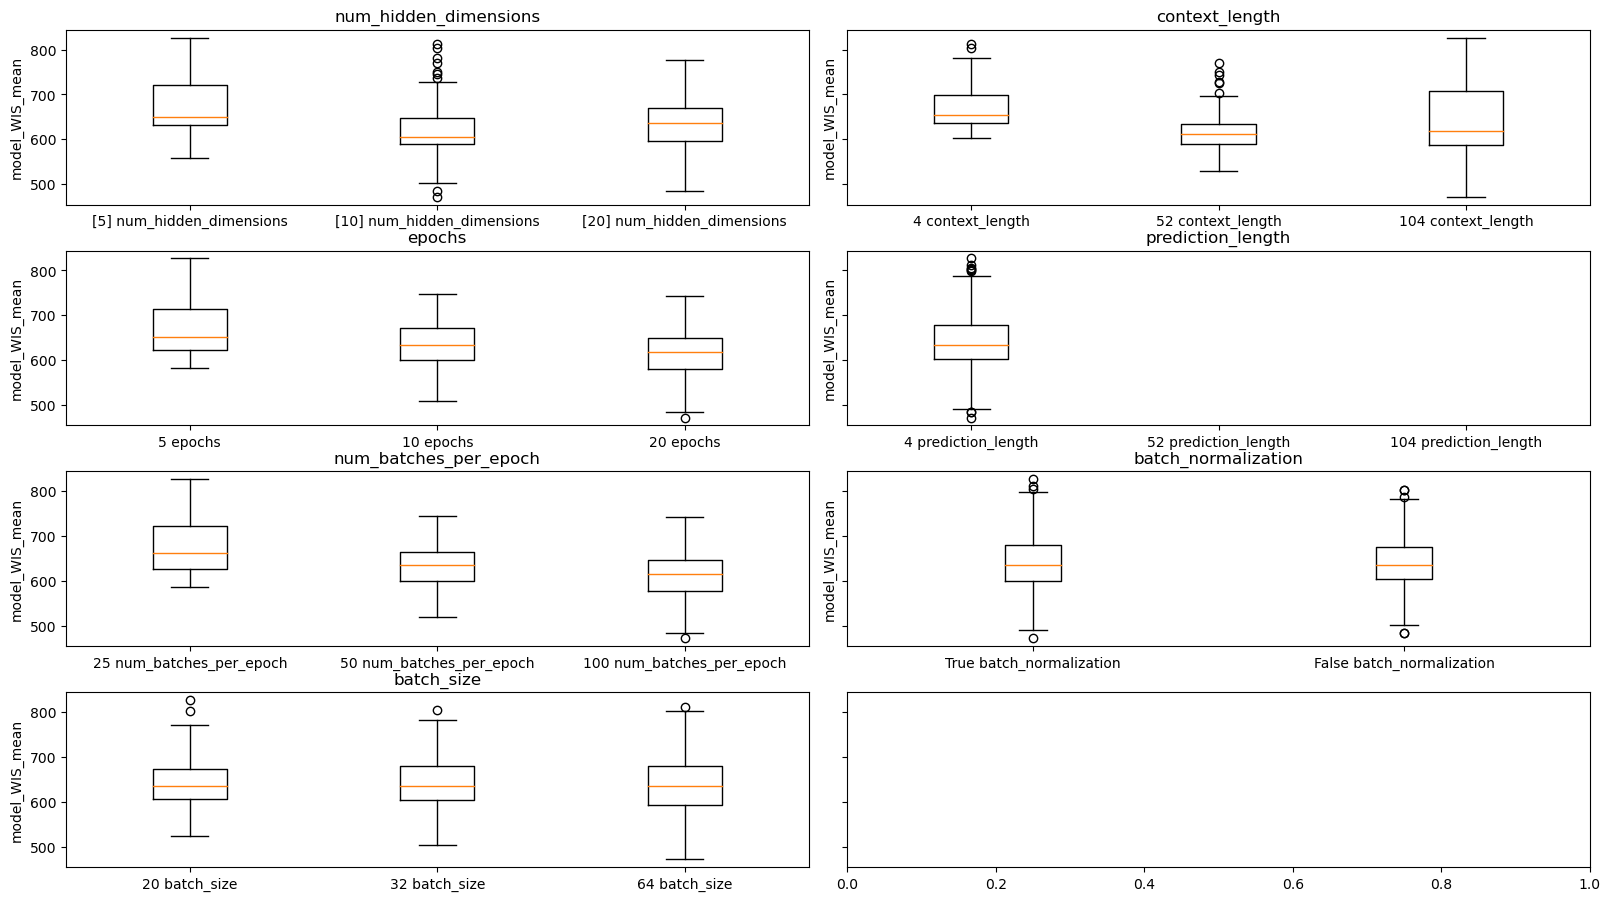

In [4]:
unique_df_15_05 = overall_df_15_05[added_cols+[col for col in df_15_05.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates()
print(len(unique_df_15_05))
print(len(overall_df_15_05))
#hyperparameter_boxplots(unique_df_15_05, hp_search_space_15_05, col="model_WIS_variance")
#print("________________")
hyperparameter_boxplots(unique_df_15_05, hp_search_space_15_05, col="model_WIS_mean")

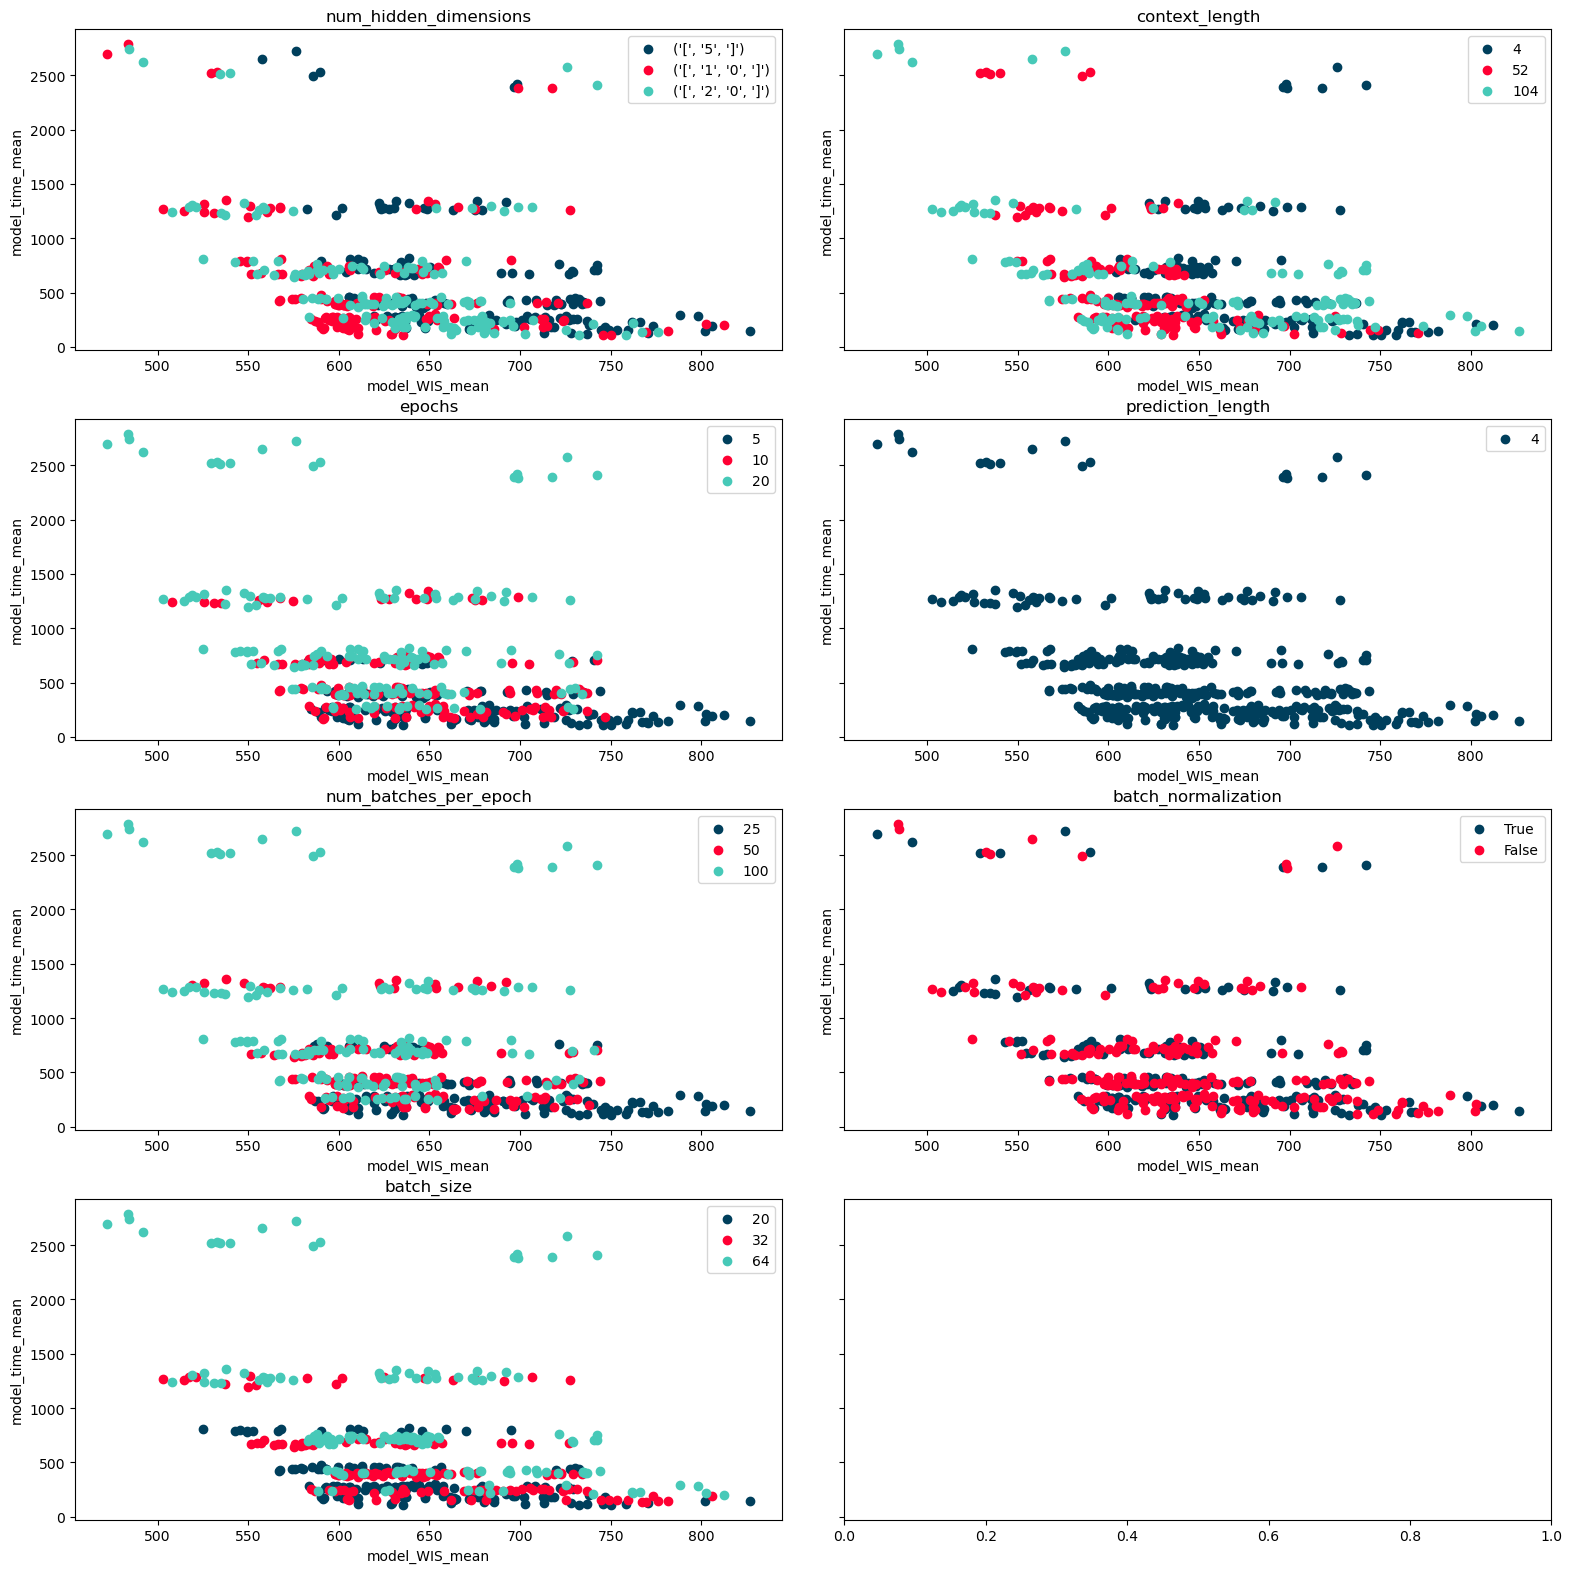

In [5]:
hp_color_plot(config, overall_df_15_05, hp_search_space_15_05, )

# 27.05

In [6]:
experiment_path = "/home/reffert/ray_results/objectiveFNN_2023-05-27_09-47-44"
df_27_05 = restore_HP_results(experiment_path, objectiveFNN, train, test, config)
#pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/HyperparameterFiles/FNN_Hyperparameter_results_27_05.csv", sep=',')
hp_search_space_27_05 ={
    "num_hidden_dimensions": tune.grid_search([[5], [20]]),
    "context_length":tune.grid_search([4, 52, 104]),
    "epochs":tune.grid_search([50, 200]),
    "prediction_length" : tune.grid_search([4, 104]), # This parameter should be removed!! and set to 4 
    "num_batches_per_epoch":tune.grid_search([25, 100]),
    "batch_normalization":tune.grid_search([True, False]),
    "batch_size":tune.grid_search([20, 64]),
    }
if "config/num_hidden_dimensions"in list(df_27_05.columns):
    df_27_05["config/num_hidden_dimensions"]=df_27_05["config/num_hidden_dimensions"].apply(lambda x: tuple(str(x)))
df_27_05 = df_27_05.loc[df_27_05["config/prediction_length"]==4]
model_results_by_hp_27_05, overall_df_27_05 = generate_model_results_by_hp_dict(df_27_05, hp_search_space_27_05)

Loading results from /home/reffert/ray_results/objectiveFNN_2023-05-27_09-47-44...


2023-06-02 14:06:46,471	INFO worker.py:1553 -- Started a local Ray instance.
2023-06-02 14:07:01,304	WARNING tuner_internal.py:292 -- The trainable will be overwritten - this should be done with caution: it's possible to supply an incompatible trainable, and there are no guarantees that the resumed experiment will continue successfully. If you encounter errors during training, ensure that you are passing in the same trainable that was passed into the initial `Tuner` object.
2023-06-02 14:07:01,408	INFO experiment_analysis.py:789 -- No `self.trials`. Drawing logdirs from checkpoint file. This may result in some information that is out of sync, as checkpointing is periodic.


There are combinations with fewer modelRuns!!
                           total_modelruns  independent_combinations
modelruns_per_combination                                           
5.0                                    420                      84.0
4.0                                     48                      12.0


In [7]:
display(overall_df_27_05.sort_values("model_WIS_mean")[added_cols+[col for col in df_27_05.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates().head(20))

,model_WIS_mean,model_WIS_variance,model_WIS_sd,model_WIS_median,model_time_mean,model_time_variance,model_time_sd,model_time_median,shape,config/batch_normalization,config/batch_size,config/context_length,config/epochs,config/num_batches_per_epoch,config/num_hidden_dimensions,config/prediction_length
669,461.111997,2.480487,1.574956,461.213958,6705.704299,2.679607e+06,1636.950379,6354.191892,4.0,True,64,104,200,100,"([, 2, 0, ])",4
479,462.227523,11.712924,3.422415,461.797539,7073.590085,3.998831e+06,1999.707674,7026.678557,4.0,False,64,104,200,100,"([, 2, 0, ])",4
285,463.567452,34.803760,5.899471,461.950769,2927.373635,5.682769e+05,753.841413,2807.299752,5.0,False,20,104,200,100,"([, 2, 0, ])",4
430,464.588499,20.395781,4.516169,461.864060,6867.410571,3.313835e+06,1820.394078,7261.687445,5.0,True,64,104,200,100,"([, 5, ])",4
239,466.144634,1.486837,1.219359,465.716150,7210.663849,3.111420e+06,1763.921882,7410.431010,5.0,False,64,104,200,100,"([, 5, ])",4
92,466.792597,81.614343,9.034066,463.999257,2971.142241,1.080849e+06,1039.638934,2641.000566,5.0,True,20,104,200,100,"([, 2, 0, ])",4
467,466.937028,3.911818,1.977832,466.951701,2043.098293,1.995334e+05,446.691635,2207.892228,4.0,False,64,104,50,100,"([, 2, 0, ])",4
82,468.712372,85.113742,9.225711,471.414112,2661.552167,1.333080e+06,1154.590779,2669.749491,4.0,True,64,104,50,100,"([, 2, 0, ])",4
620,476.593415,94.107768,9.700916,476.368422,3172.831376,8.844942e+05,940.475516,3028.461003,5.0,False,20,104,200,100,"([, 5, ])",4
236,480.199894,100.935808,10.046681,479.311548,3104.868618,1.240238e+06,1113.659539,2999.034067,5.0,True,20,104,200,100,"([, 5, ])",4


96
468


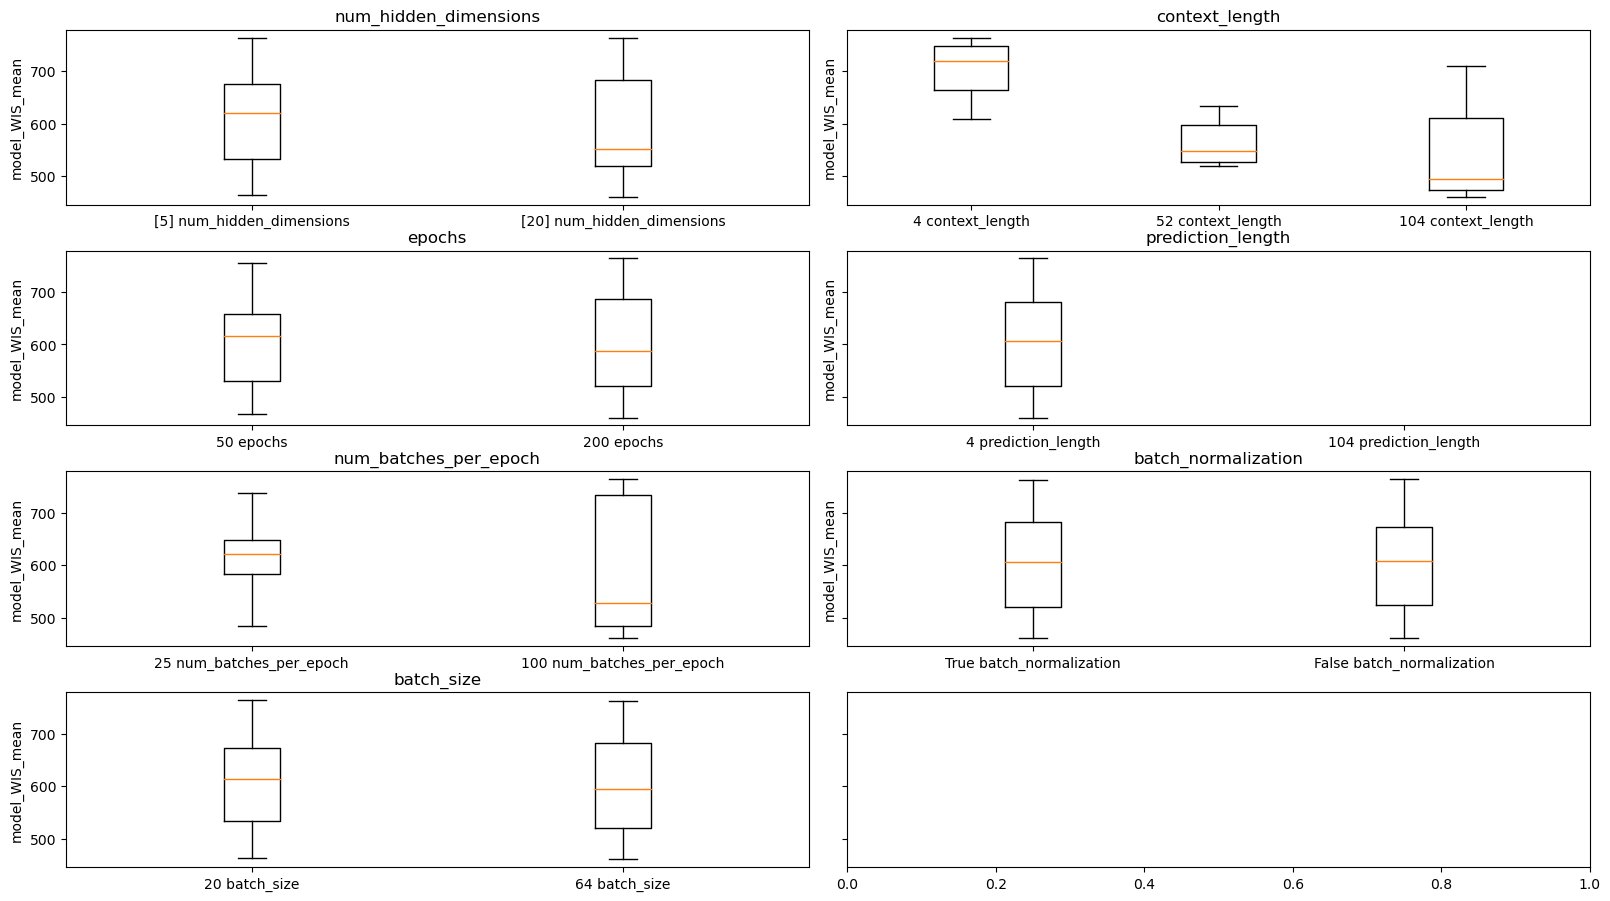

In [8]:
unique_df_27_05 = overall_df_27_05[added_cols+[col for col in df_27_05.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates()
print(len(unique_df_27_05))
print(len(overall_df_27_05))
#hyperparameter_boxplots(unique_df_27_05, hp_search_space_27_05, col="model_WIS_variance")
#print("________________")
hyperparameter_boxplots(unique_df_27_05, hp_search_space_27_05, col="model_WIS_mean")

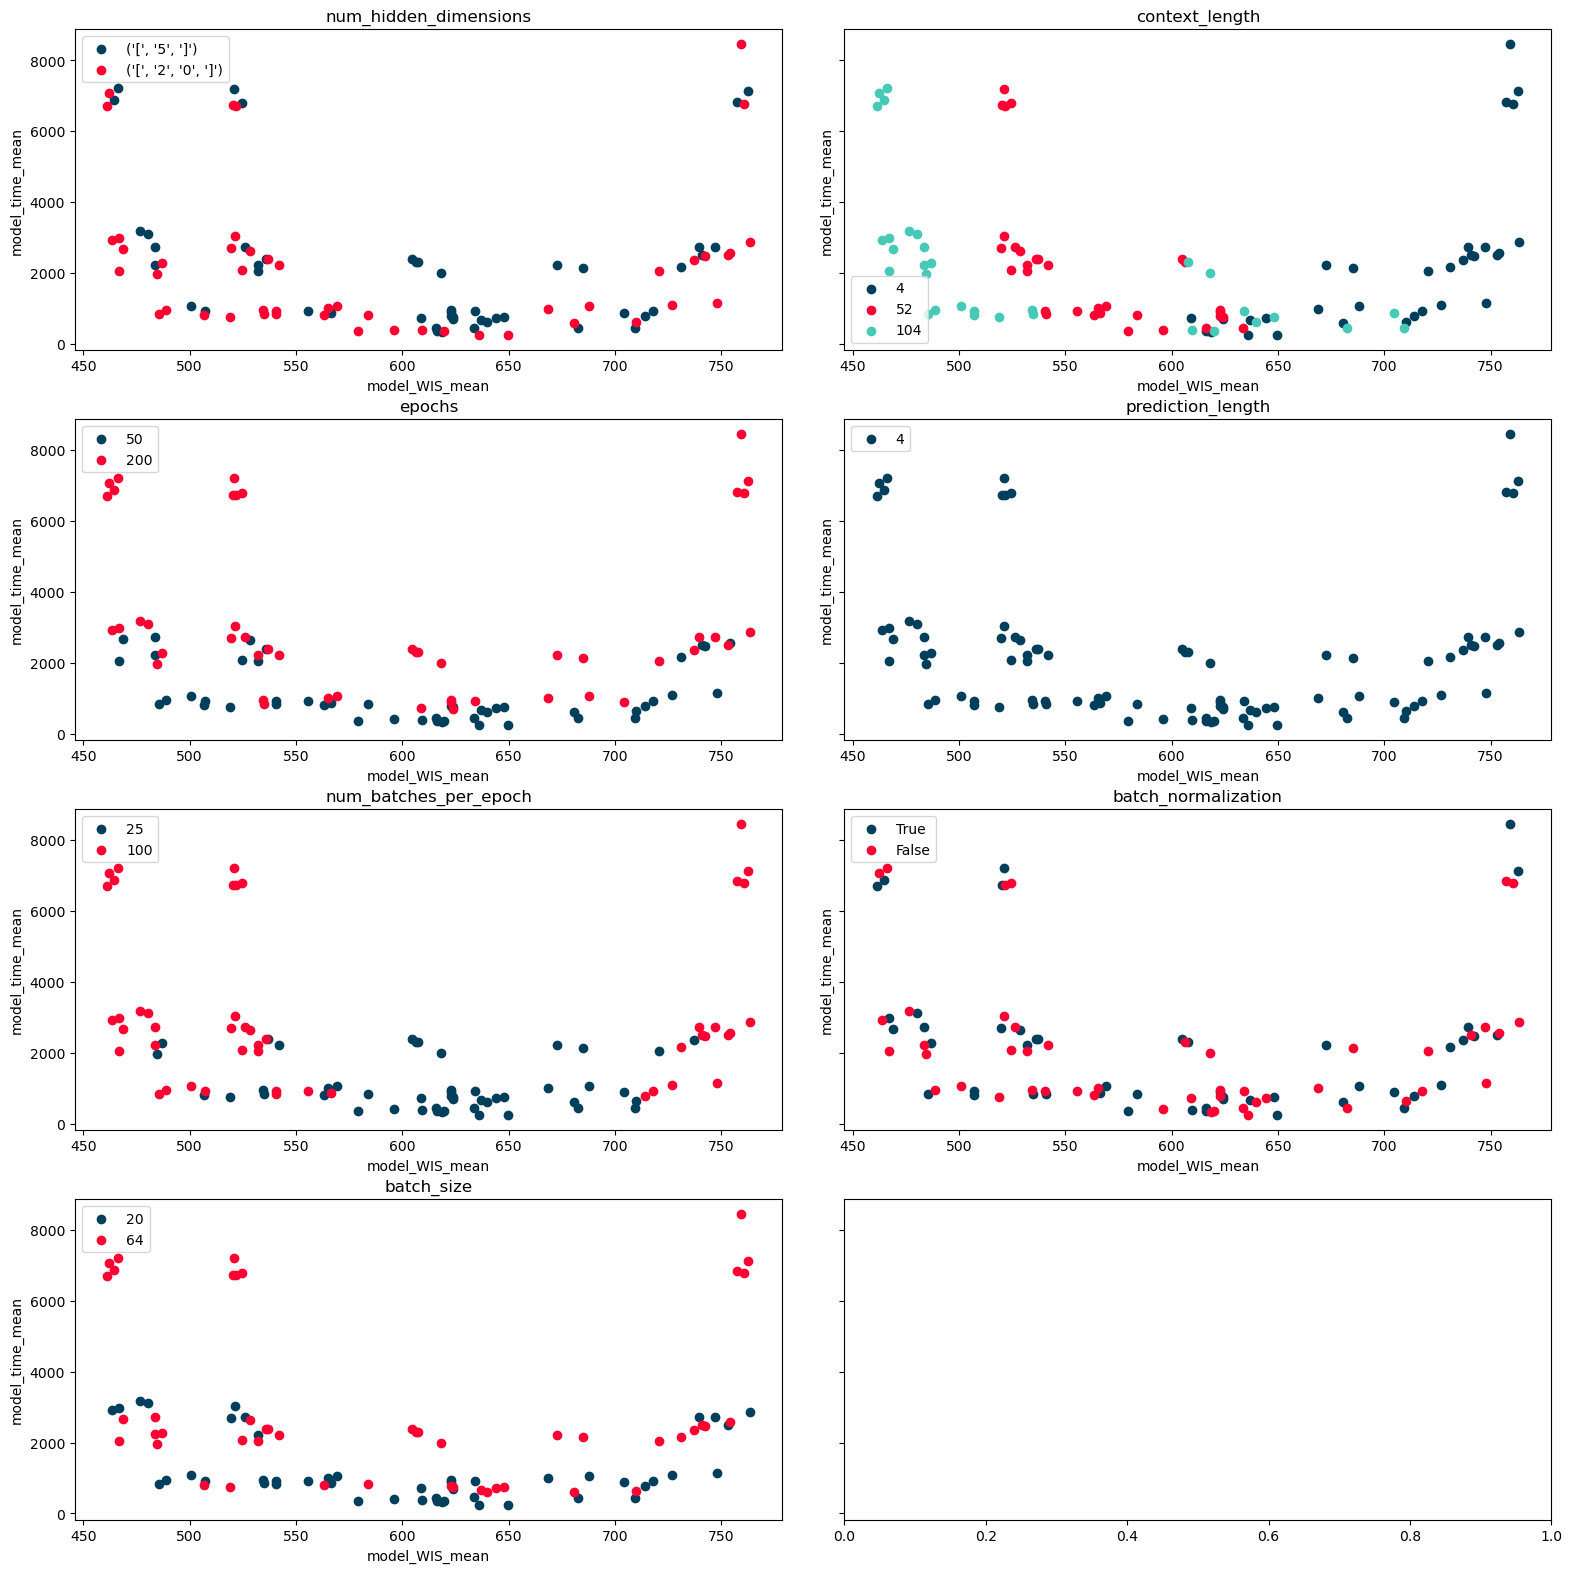

In [9]:
hp_color_plot(config, overall_df_27_05, hp_search_space_27_05, )

# 30.05_1

In [10]:
df_30_05_01 = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/HyperparameterFiles/FNN_Hyperparameter_results_30_05.csv", sep=',')
hp_search_space_30_05_01 = {
    "num_hidden_dimensions": tune.grid_search([[40,40],[80,80],[20,20]]),
    "context_length":tune.grid_search([4, 52, 104]),
    "epochs":tune.grid_search([100, 200]),
    "prediction_length" : tune.grid_search([4]), 
    "num_batches_per_epoch":tune.grid_search([50]),
    "batch_normalization":tune.grid_search([True, False]),
    "batch_size":tune.grid_search([32]),
    }
if "config/num_hidden_dimensions"in list(df_30_05_01.columns):
    df_30_05_01["config/num_hidden_dimensions"]=df_30_05_01["config/num_hidden_dimensions"].apply(lambda x: tuple(x))
model_results_by_hp_30_05_01, overall_df_30_05_01 = generate_model_results_by_hp_dict(df_30_05_01, hp_search_space_30_05_01)

                           total_modelruns  independent_combinations
modelruns_per_combination                                           
5.0                                    180                      36.0


In [11]:
display(overall_df_30_05_01.sort_values("model_WIS_mean")[added_cols+[col for col in df_30_05_01.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates().head(20))

,model_WIS_mean,model_WIS_variance,model_WIS_sd,model_WIS_median,model_time_mean,model_time_variance,model_time_sd,model_time_median,shape,config/batch_normalization,config/batch_size,config/context_length,config/epochs,config/num_batches_per_epoch,config/num_hidden_dimensions,config/prediction_length
159,404.274504,6.581577,2.565458,404.585532,941.174707,107967.262809,328.583723,1168.548839,5.0,False,32,52,100,50,"([, 8, 0, ,, , 8, 0, ])",4
21,409.350567,172.180297,13.121749,404.878319,1817.121160,403858.397368,635.498542,2134.354753,5.0,False,32,52,200,50,"([, 8, 0, ,, , 8, 0, ])",4
131,410.393279,11.015576,3.318972,411.415524,1724.309561,327039.408586,571.873595,1927.895773,5.0,False,32,104,200,50,"([, 8, 0, ,, , 8, 0, ])",4
45,411.084625,3.935646,1.983846,411.530227,1765.399536,392442.967439,626.452686,2187.159524,5.0,False,32,52,200,50,"([, 4, 0, ,, , 4, 0, ])",4
119,411.198520,126.223706,11.234932,406.599831,1785.222644,375657.130791,612.908746,2040.612828,5.0,False,32,104,200,50,"([, 4, 0, ,, , 4, 0, ])",4
3,417.605276,60.371465,7.769908,417.151217,967.475242,94774.432856,307.854564,1020.277971,5.0,False,32,52,100,50,"([, 4, 0, ,, , 4, 0, ])",4
160,418.190107,13.119111,3.622031,418.490181,973.002576,105670.983030,325.070735,1091.965571,5.0,True,32,104,100,50,"([, 8, 0, ,, , 8, 0, ])",4
164,423.410558,23.341415,4.831295,426.467331,1825.783236,400312.812539,632.702784,2269.834886,5.0,True,32,52,200,50,"([, 8, 0, ,, , 8, 0, ])",4
35,423.752457,41.757044,6.461969,422.801681,1679.569185,356937.621515,597.442568,1622.534257,5.0,False,32,104,200,50,"([, 2, 0, ,, , 2, 0, ])",4
94,424.092550,82.127460,9.062420,420.324057,1760.102528,373274.733355,610.962137,2047.925153,5.0,True,32,104,200,50,"([, 8, 0, ,, , 8, 0, ])",4


36
180


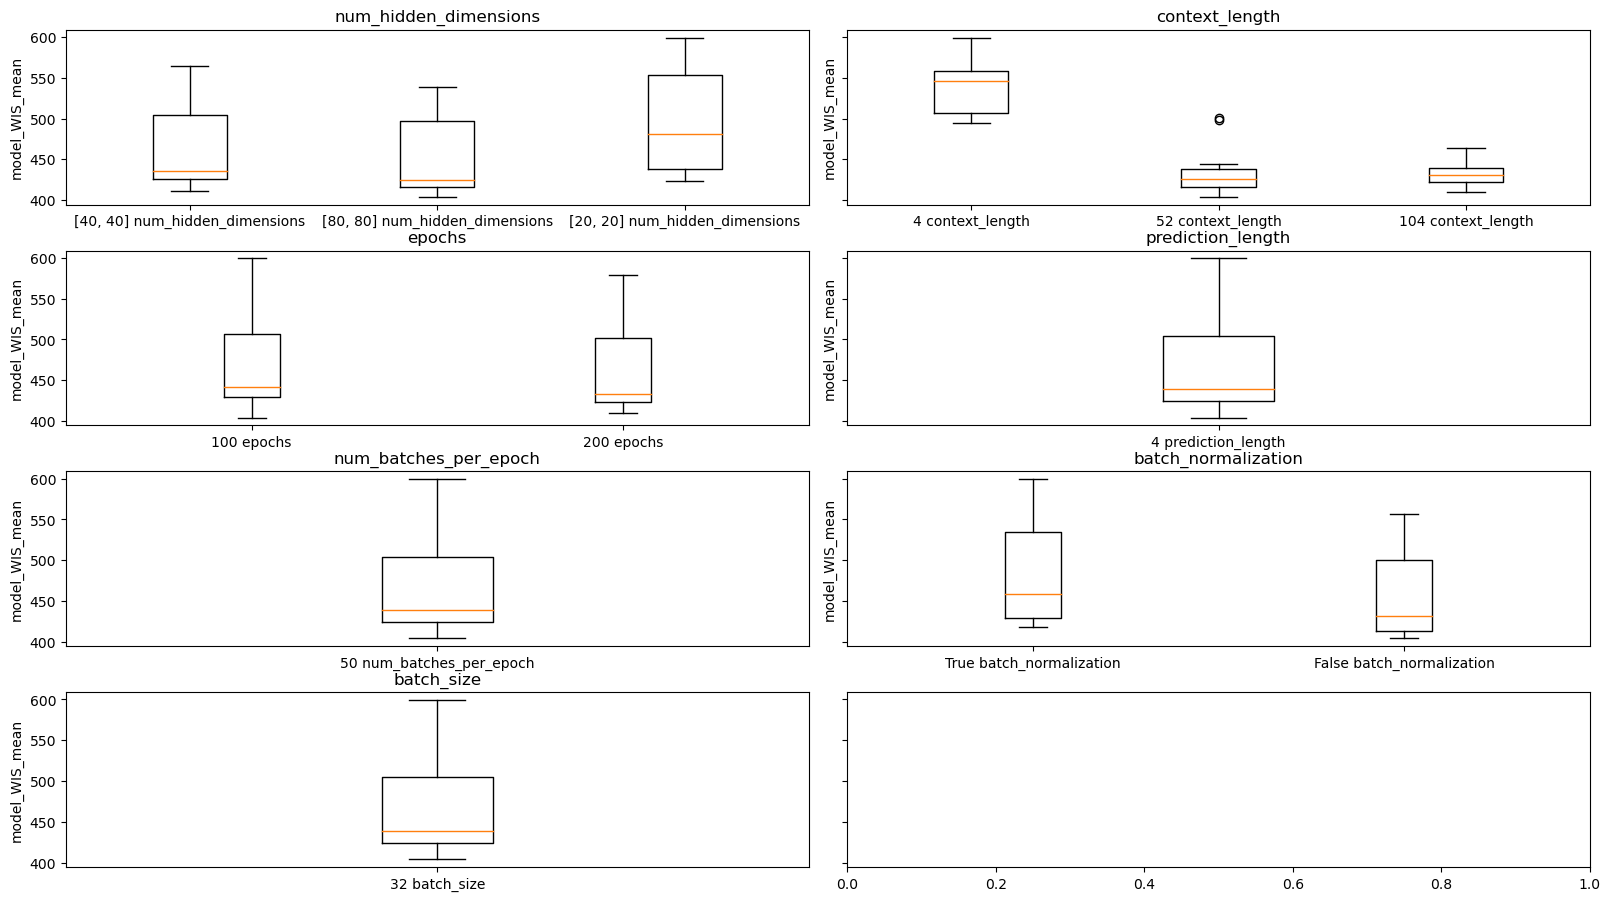

In [12]:
unique_df_30_05_01 = overall_df_30_05_01[added_cols+[col for col in df_30_05_01.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates()
print(len(unique_df_30_05_01))
print(len(overall_df_30_05_01))
#hyperparameter_boxplots(unique_df_30_05_01, hp_search_space_30_05_01, col="model_WIS_variance")
#print("________________")
hyperparameter_boxplots(unique_df_30_05_01, hp_search_space_30_05_01, col="model_WIS_mean")

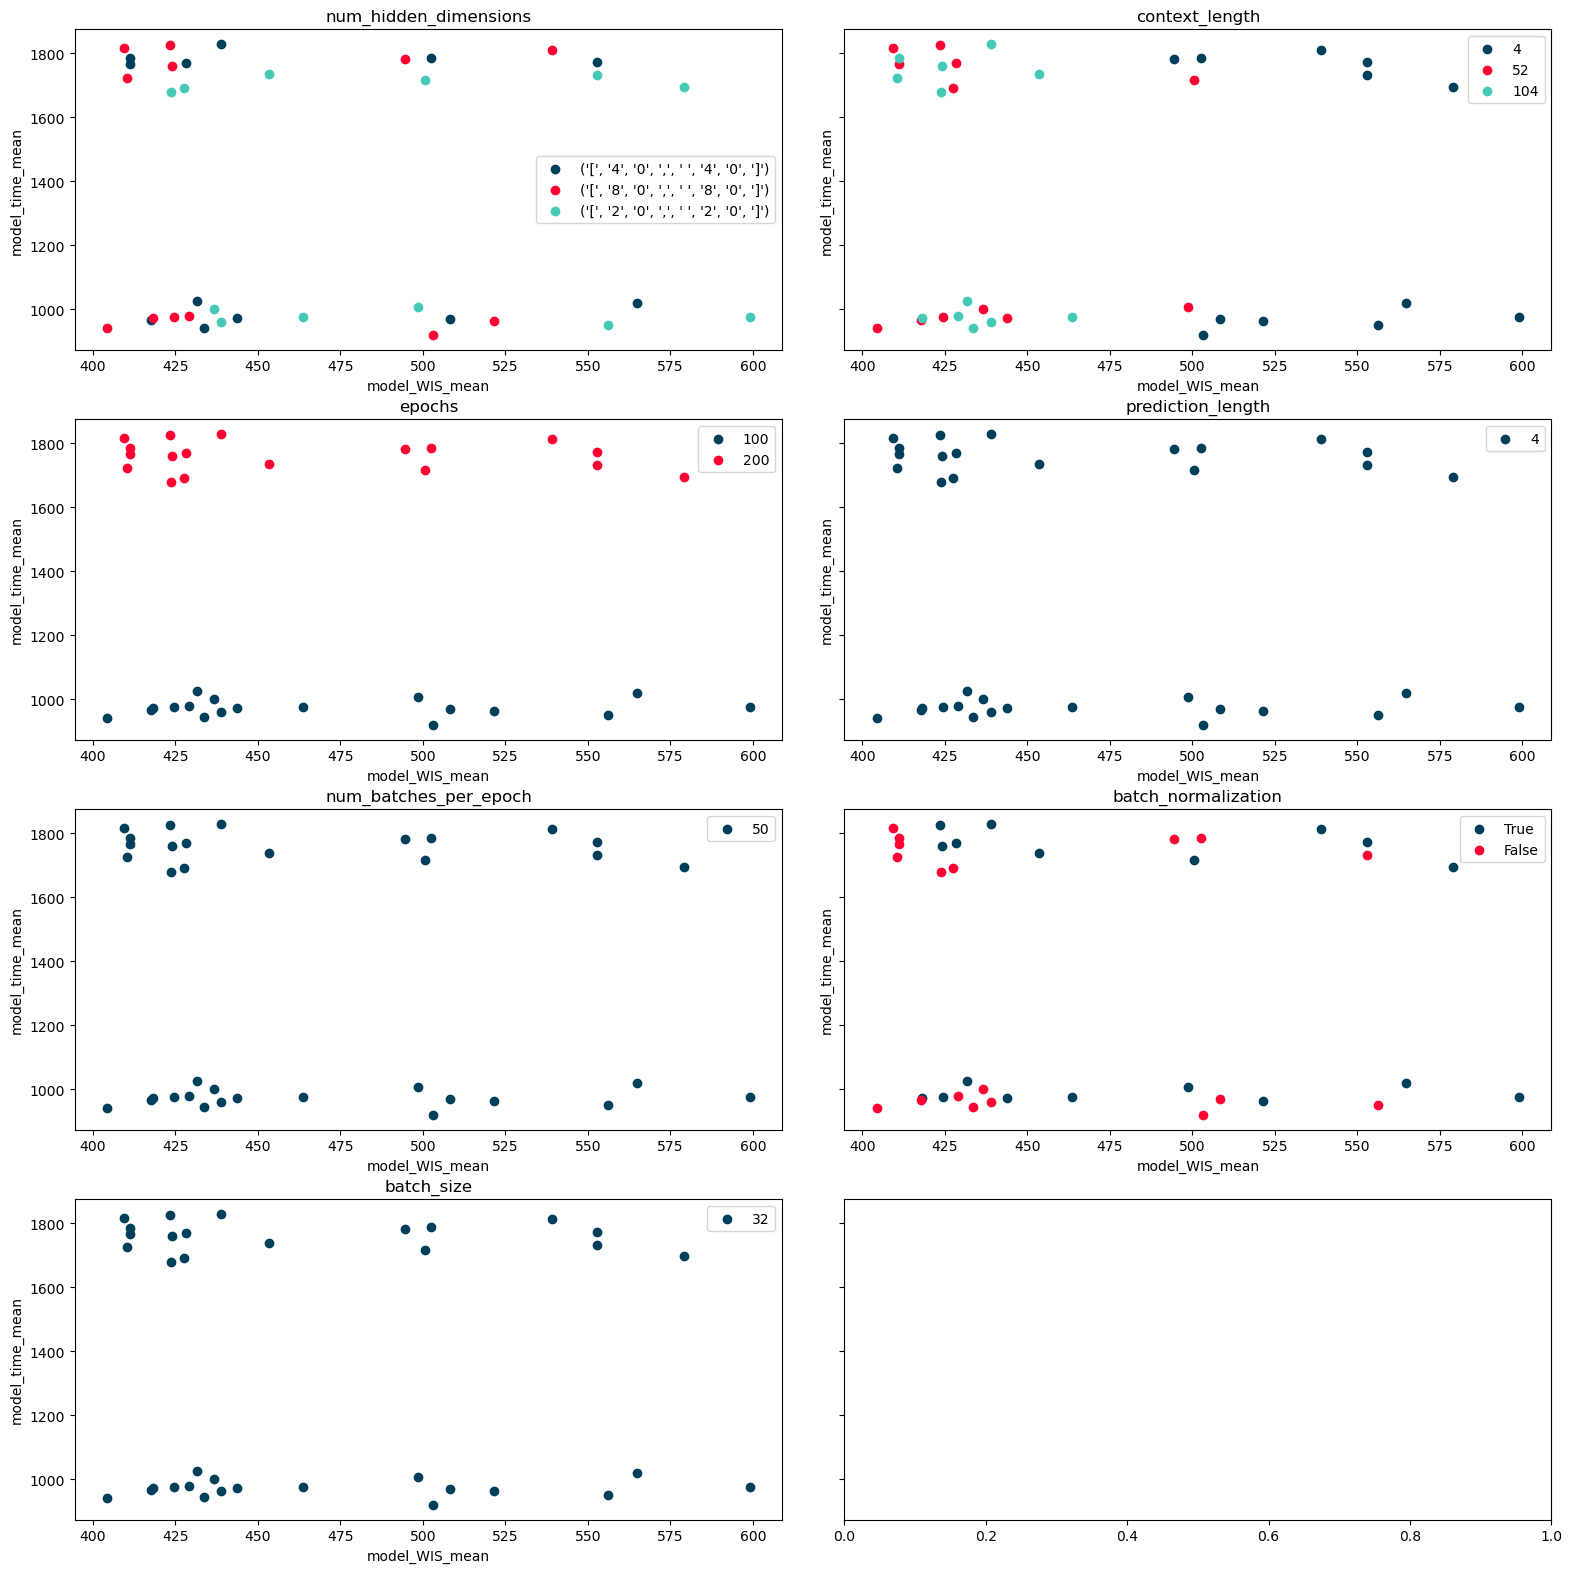

In [13]:
hp_color_plot(config, overall_df_30_05_01, hp_search_space_30_05_01, )

# 30.05_2

In [14]:
df_30_05_02 = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/HyperparameterFiles/FNN_Hyperparameter_results_30_05_02.csv", sep=',')
hp_search_space_30_05_02 = {
    "num_hidden_dimensions": tune.grid_search([[100,100],[80,80]]),
    "context_length":tune.grid_search([4, 52, 104]),
    "epochs":tune.grid_search([100, 200]),
    "prediction_length" : tune.grid_search([4]), 
    "num_batches_per_epoch":tune.grid_search([30, 50]),
    "batch_normalization":tune.grid_search([True, False]),
    "batch_size":tune.grid_search([32]),
    }
if "config/num_hidden_dimensions"in list(df_30_05_02.columns):
    df_30_05_02["config/num_hidden_dimensions"]=df_30_05_02["config/num_hidden_dimensions"].apply(lambda x: tuple(x))
model_results_by_hp_30_05_02, overall_df_30_05_02 = generate_model_results_by_hp_dict(df_30_05_02, hp_search_space_30_05_02)

                           total_modelruns  independent_combinations
modelruns_per_combination                                           
5.0                                    240                      48.0


In [15]:
display(overall_df_30_05_02.sort_values("model_WIS_mean")[added_cols+[col for col in df_30_05_02.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates().head(20))

,model_WIS_mean,model_WIS_variance,model_WIS_sd,model_WIS_median,model_time_mean,model_time_variance,model_time_sd,model_time_median,shape,config/batch_normalization,config/batch_size,config/context_length,config/epochs,config/num_batches_per_epoch,config/num_hidden_dimensions,config/prediction_length
45,403.508400,7.180404,2.679628,403.061931,1871.714597,317481.465994,563.454937,1760.147875,5.0,False,32,52,200,50,"([, 8, 0, ,, , 8, 0, ])",4
231,405.989230,33.216222,5.763352,406.085949,1075.895517,78546.993249,280.262365,1124.821966,5.0,False,32,52,100,50,"([, 8, 0, ,, , 8, 0, ])",4
69,407.916159,28.993438,5.384556,409.413608,2043.082358,414300.370723,643.661690,2401.625739,5.0,False,32,52,200,50,"([, 1, 0, 0, ,, , 1, 0, 0, ])",4
15,408.800997,30.738643,5.544244,409.232690,1046.611119,139841.723324,373.954173,1126.136892,5.0,False,32,52,100,50,"([, 1, 0, 0, ,, , 1, 0, 0, ])",4
225,411.443444,20.257422,4.500825,410.383872,1381.679958,223202.337133,472.442946,1470.117102,5.0,False,32,52,200,30,"([, 8, 0, ,, , 8, 0, ])",4
123,419.490701,75.241792,8.674203,417.267570,756.007698,91217.427348,302.022230,939.218896,5.0,False,32,52,100,30,"([, 8, 0, ,, , 8, 0, ])",4
105,419.759811,249.590142,15.798422,411.219556,1097.002625,102439.118004,320.061116,1201.093739,5.0,False,32,52,200,30,"([, 1, 0, 0, ,, , 1, 0, 0, ])",4
140,422.415114,57.583471,7.588377,423.894052,1819.815744,232438.680829,482.118949,1879.525181,5.0,True,32,52,200,50,"([, 8, 0, ,, , 8, 0, ])",4
40,422.445241,89.665664,9.469196,417.823271,1151.224711,109571.253635,331.015489,1257.612205,5.0,True,32,104,100,50,"([, 8, 0, ,, , 8, 0, ])",4
47,422.496143,40.410400,6.356917,422.011114,1818.471077,356441.699209,597.027386,1451.493915,5.0,False,32,104,200,50,"([, 8, 0, ,, , 8, 0, ])",4


48
240


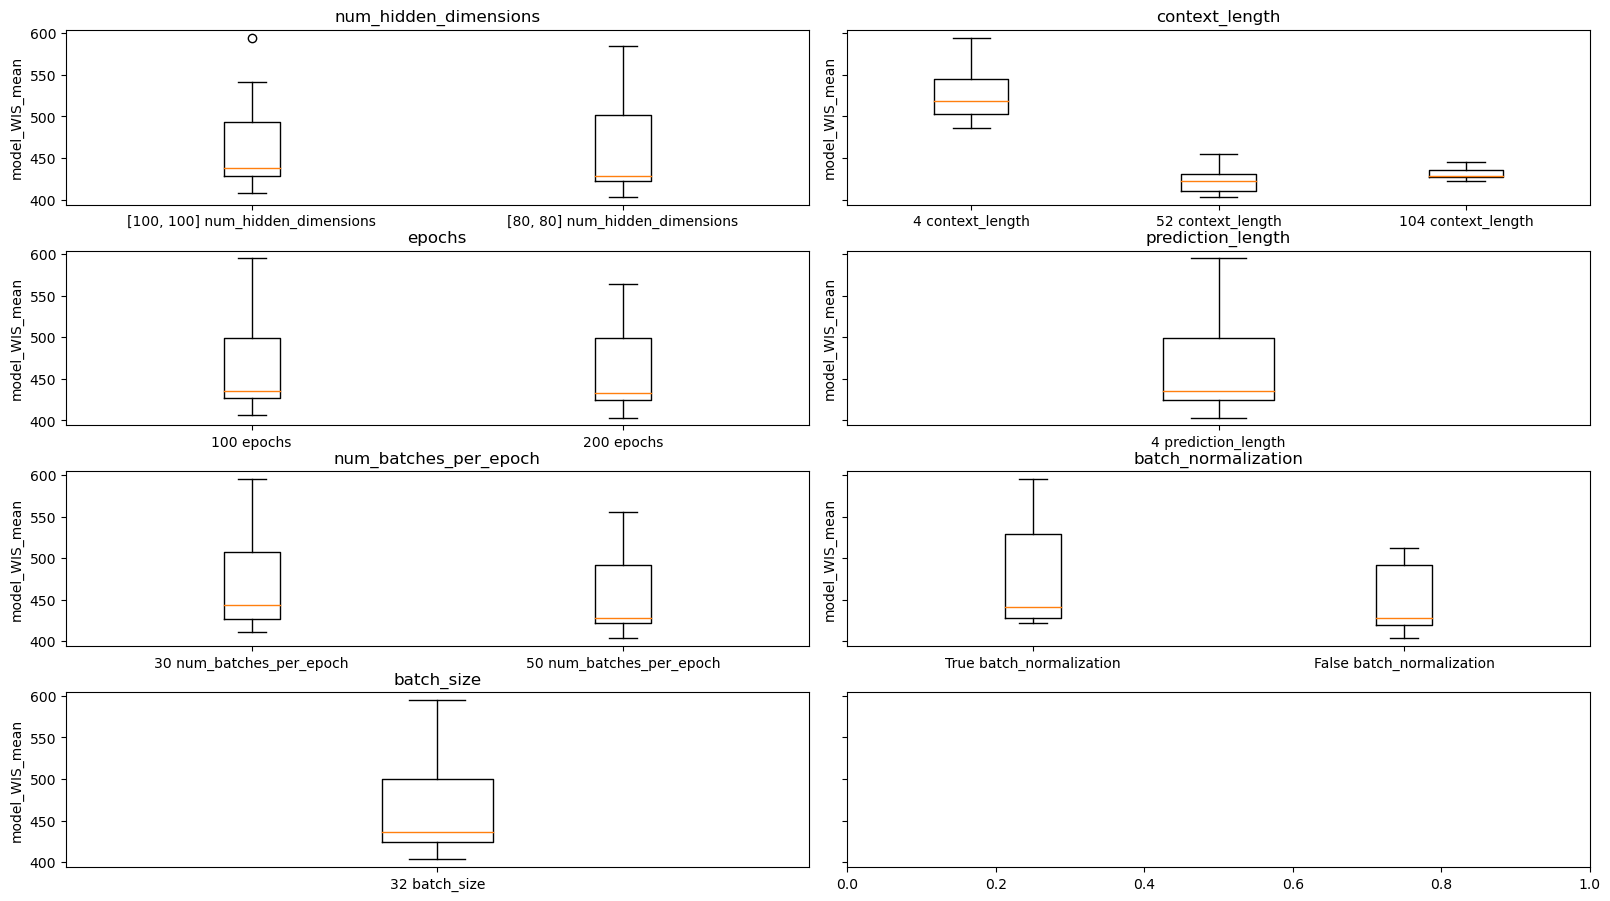

In [16]:
unique_df_30_05_02 = overall_df_30_05_02[added_cols+[col for col in df_30_05_02.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates()
print(len(unique_df_30_05_02))
print(len(overall_df_30_05_02))
#hyperparameter_boxplots(unique_df_30_05_02, hp_search_space_30_05_02, col="model_WIS_variance")
#print("________________")
hyperparameter_boxplots(unique_df_30_05_02, hp_search_space_30_05_02, col="model_WIS_mean")

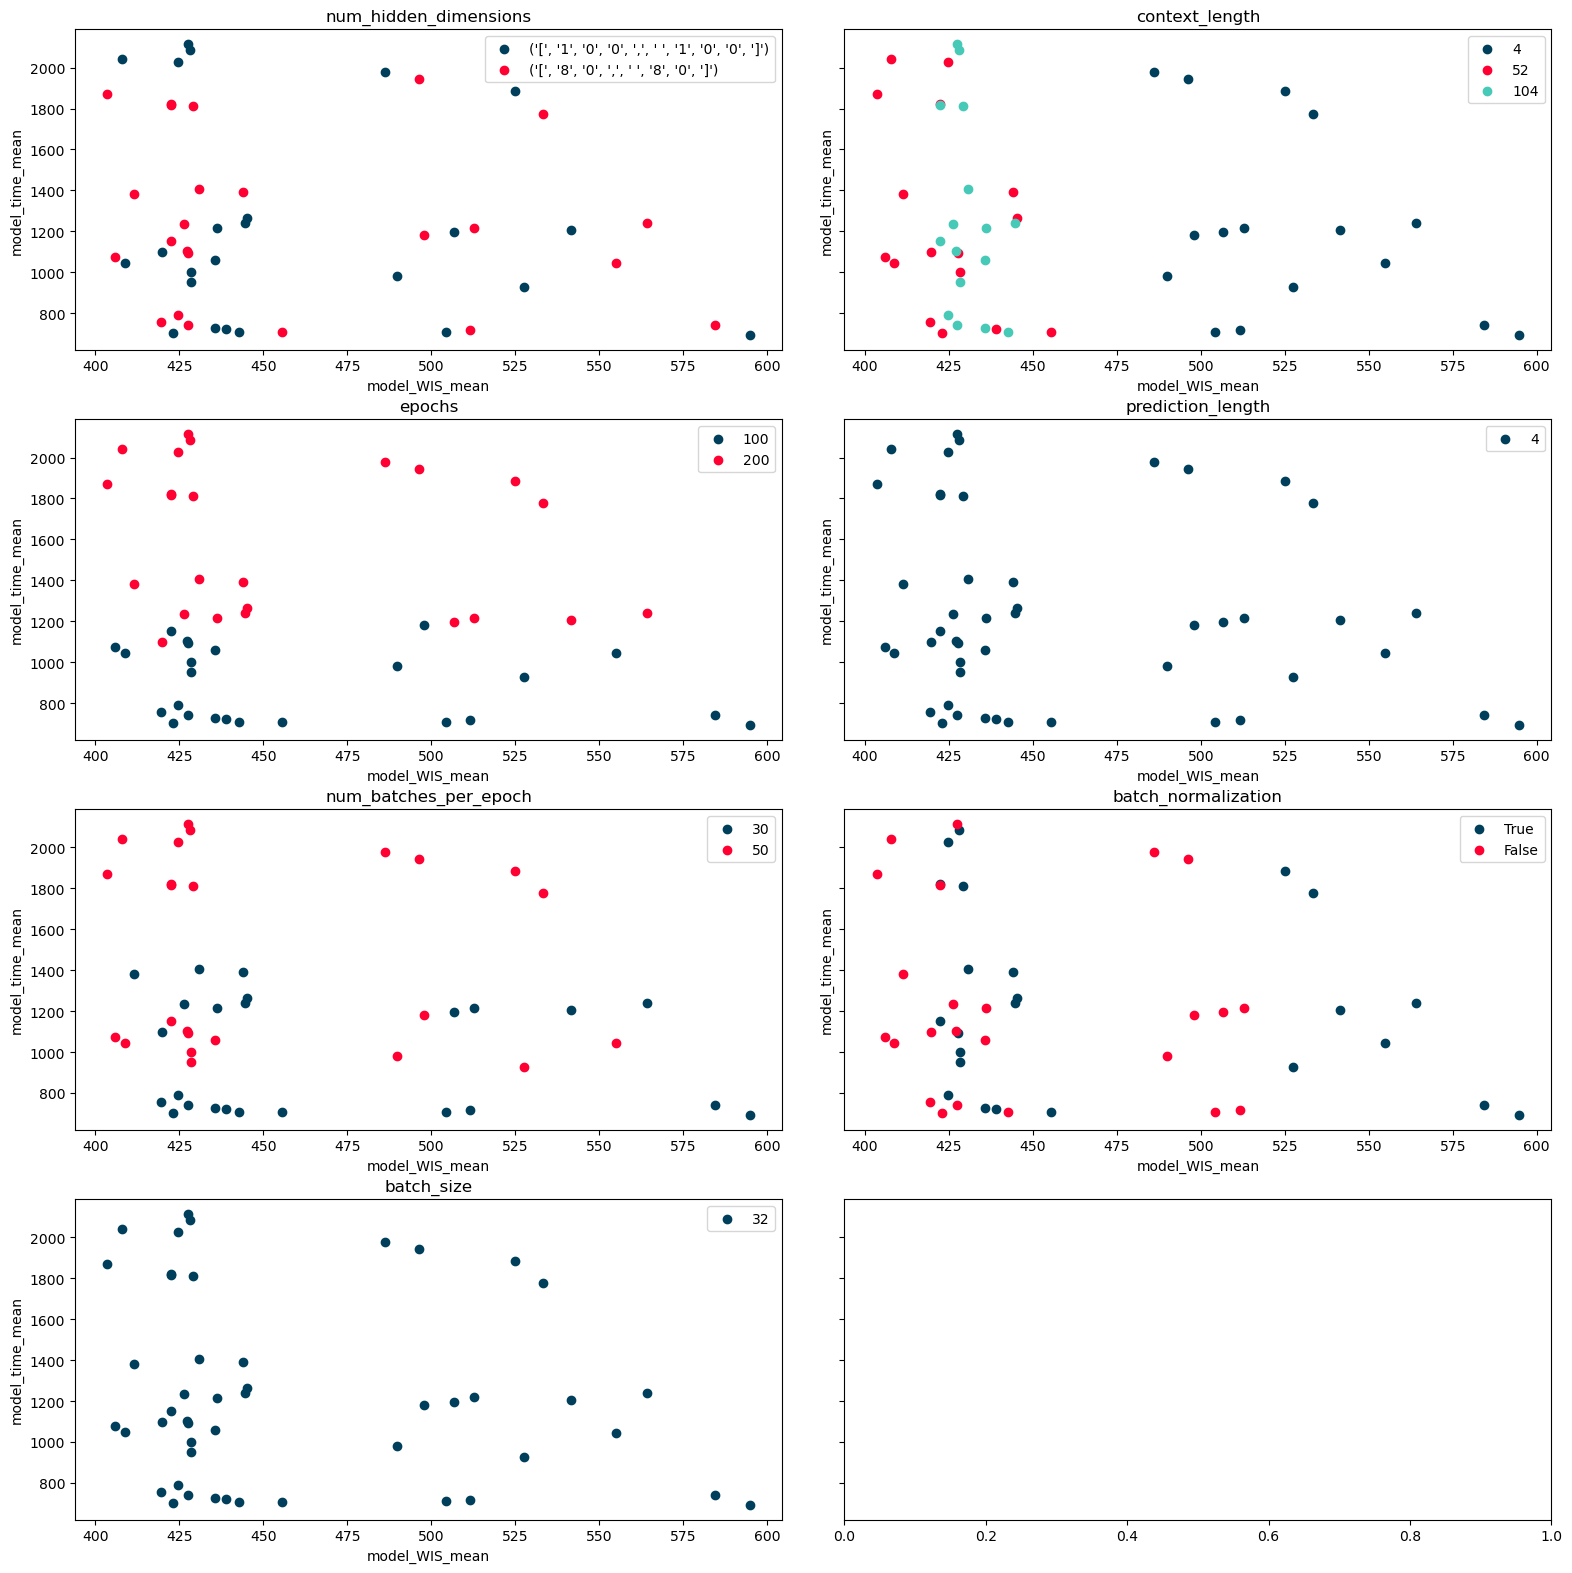

In [17]:
hp_color_plot(config, overall_df_30_05_02, hp_search_space_30_05_02, )

# 31.05_1

In [18]:
df_31_05_01 = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/HyperparameterFiles/FNN_Hyperparameter_results_31_05.csv", sep=',')
hp_search_space_31_05_01 = {
    "num_hidden_dimensions": tune.grid_search([[140,140],[180,180]]),
    "context_length":tune.grid_search([2, 26, 208]),
    "epochs":tune.grid_search([100, 200]),
    "prediction_length" : tune.grid_search([4]), 
    "num_batches_per_epoch":tune.grid_search([40, 60]),
    "batch_normalization":tune.grid_search([True, False]),
    "batch_size":tune.grid_search([16, 64]),
    }
if "config/num_hidden_dimensions"in list(df_31_05_01.columns):
    df_31_05_01["config/num_hidden_dimensions"]=df_31_05_01["config/num_hidden_dimensions"].apply(lambda x: tuple(x))
model_results_by_hp_31_05_01, overall_df_31_05_01 = generate_model_results_by_hp_dict(df_31_05_01, hp_search_space_31_05_01)

                           total_modelruns  independent_combinations
modelruns_per_combination                                           
5.0                                    480                      96.0


In [19]:
display(overall_df_31_05_01.sort_values("model_WIS_mean")[added_cols+[col for col in df_31_05_01.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates().head(20))

,model_WIS_mean,model_WIS_variance,model_WIS_sd,model_WIS_median,model_time_mean,model_time_variance,model_time_sd,model_time_median,shape,config/batch_normalization,config/batch_size,config/context_length,config/epochs,config/num_batches_per_epoch,config/num_hidden_dimensions,config/prediction_length
478,426.043362,64.334818,8.020899,424.252485,1426.525727,5883.116990,76.701480,1457.143910,5.0,True,64,208,200,60,"([, 1, 8, 0, ,, , 1, 8, 0, ])",4
406,427.192089,22.244859,4.716446,427.018135,1162.568960,152627.849143,390.676144,996.608304,5.0,True,64,208,200,40,"([, 1, 4, 0, ,, , 1, 4, 0, ])",4
430,430.064934,33.151756,5.757756,430.899101,1418.179613,473.413302,21.758063,1421.151007,5.0,True,64,208,200,60,"([, 1, 4, 0, ,, , 1, 4, 0, ])",4
166,431.709009,71.456571,8.453199,432.080348,1007.826535,2906.452493,53.911525,975.154346,5.0,True,64,208,200,40,"([, 1, 8, 0, ,, , 1, 8, 0, ])",4
23,432.264467,52.782291,7.265142,433.384037,1160.790525,159225.106750,399.030208,994.240158,5.0,False,64,208,200,40,"([, 1, 4, 0, ,, , 1, 4, 0, ])",4
418,433.023383,73.269754,8.559775,434.566523,776.143232,2107.806477,45.910854,757.479553,5.0,True,64,208,100,60,"([, 1, 4, 0, ,, , 1, 4, 0, ])",4
47,434.182428,22.788665,4.773747,434.915963,1448.140180,588.997102,24.269262,1457.008542,5.0,False,64,208,200,60,"([, 1, 4, 0, ,, , 1, 4, 0, ])",4
419,435.928843,116.860179,10.810189,432.720859,762.258670,2342.046287,48.394693,748.647352,5.0,False,64,208,100,60,"([, 1, 4, 0, ,, , 1, 4, 0, ])",4
82,437.252015,153.144117,12.375141,438.211362,750.944516,94.499534,9.721087,752.084841,5.0,True,64,208,100,60,"([, 1, 8, 0, ,, , 1, 8, 0, ])",4
383,438.011429,76.054253,8.720909,438.352194,1407.827529,1601.408907,40.017607,1423.203809,5.0,False,64,208,200,60,"([, 1, 8, 0, ,, , 1, 8, 0, ])",4


96
480


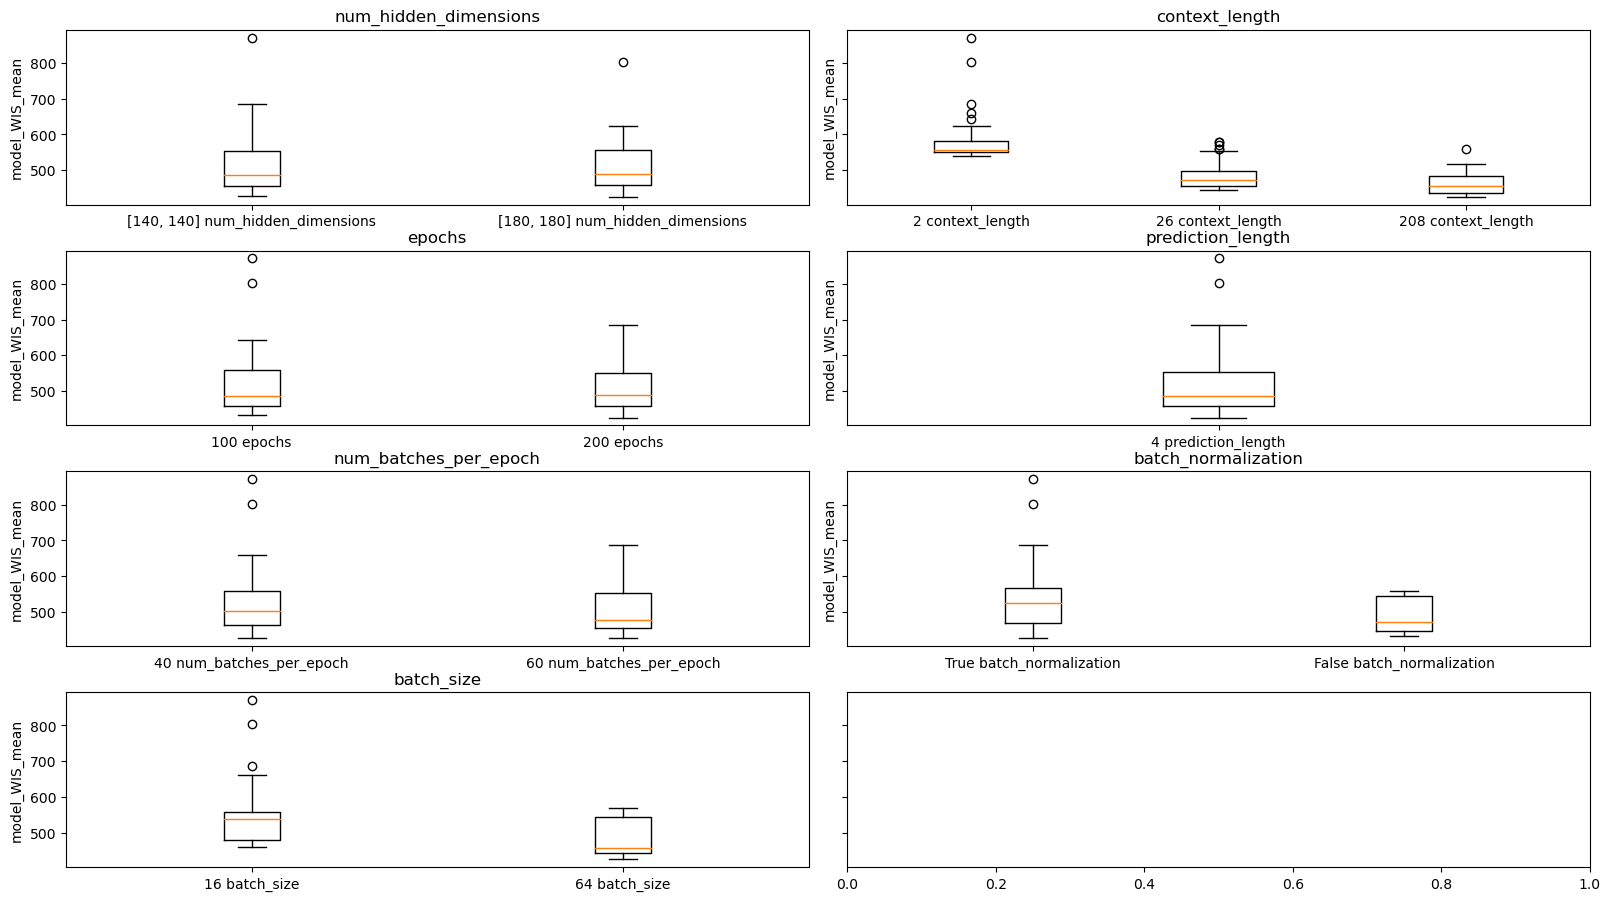

In [20]:
unique_df_31_05_01 = overall_df_31_05_01[added_cols+[col for col in df_31_05_01.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates()
print(len(unique_df_31_05_01))
print(len(overall_df_31_05_01))
#hyperparameter_boxplots(unique_df_31_05_01, hp_search_space_31_05_01, col="model_WIS_variance")
#print("________________")
hyperparameter_boxplots(unique_df_31_05_01, hp_search_space_31_05_01, col="model_WIS_mean")

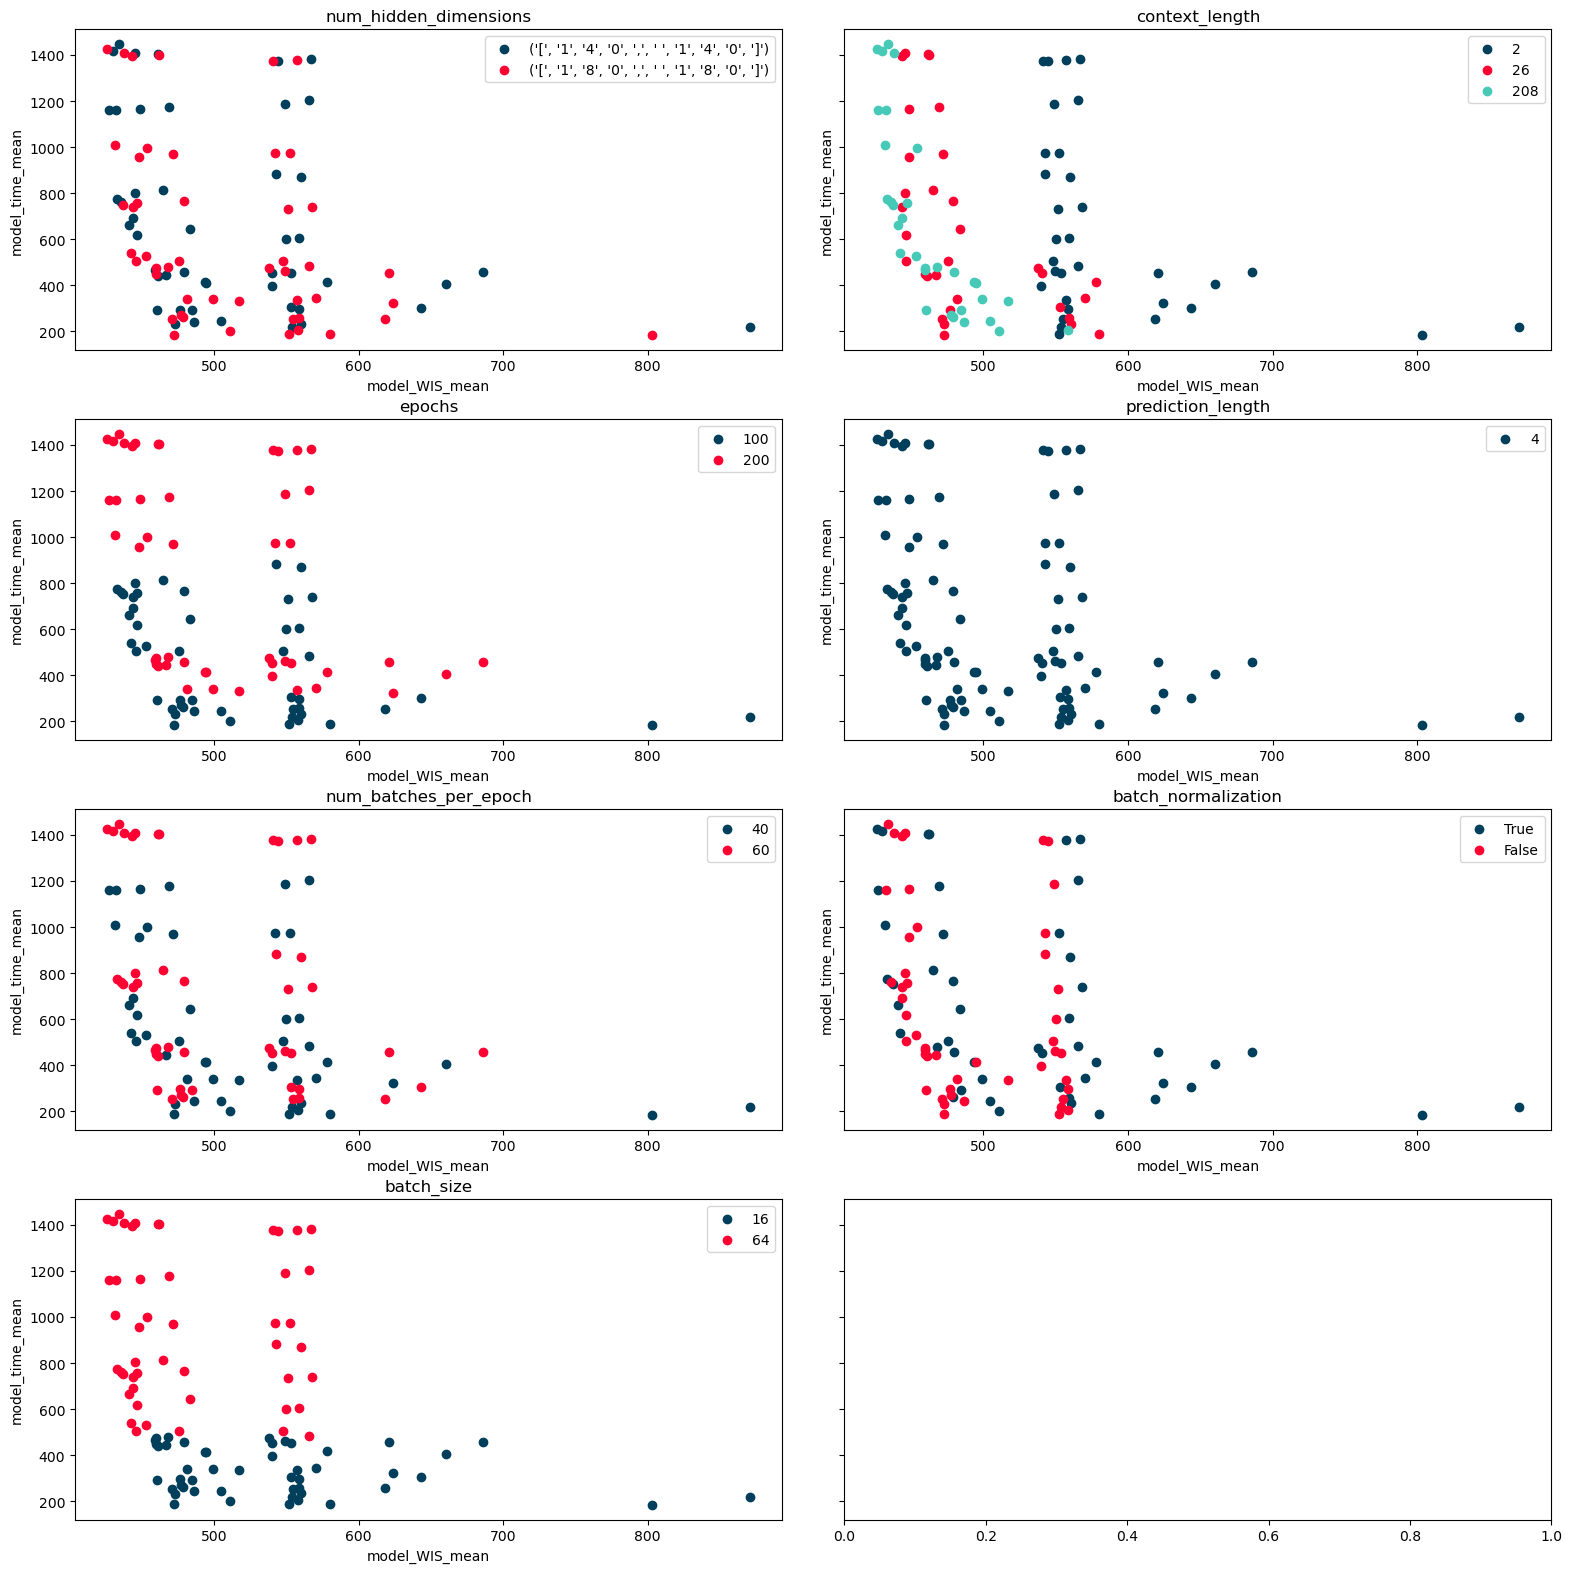

In [21]:
hp_color_plot(config, overall_df_31_05_01, hp_search_space_31_05_01, )

# 31.05_2

In [22]:
df_31_05_02 = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/HyperparameterFiles/FNN_Hyperparameter_results_31_05_02.csv", sep=',')
hp_search_space_31_05_02 = {
    "num_hidden_dimensions": tune.grid_search([[140,140],[180,180]]),
    "context_length":tune.grid_search([1, 2, 4, 104, 208]),
    "epochs":tune.grid_search([50, 75, 150]),
    "prediction_length" : tune.grid_search([4]), 
    "num_batches_per_epoch":tune.grid_search([20, 120]),
    "batch_normalization":tune.grid_search([True, False]),
    "batch_size":tune.grid_search([8, 124]),
    }
if "config/num_hidden_dimensions"in list(df_31_05_02.columns):
    df_31_05_02["config/num_hidden_dimensions"]=df_31_05_02["config/num_hidden_dimensions"].apply(lambda x: tuple(x))
model_results_by_hp_31_05_02, overall_df_31_05_02 = generate_model_results_by_hp_dict(df_31_05_02, hp_search_space_31_05_02)

                           total_modelruns  independent_combinations
modelruns_per_combination                                           
5.0                                   1200                     240.0


In [23]:
display(overall_df_31_05_02.sort_values("model_WIS_mean")[added_cols+[col for col in df_31_05_02.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates().head(20))

,model_WIS_mean,model_WIS_variance,model_WIS_sd,model_WIS_median,model_time_mean,model_time_variance,model_time_sd,model_time_median,shape,config/batch_normalization,config/batch_size,config/context_length,config/epochs,config/num_batches_per_epoch,config/num_hidden_dimensions,config/prediction_length
174,401.454014,11.533115,3.396044,401.903489,797.539118,146.532760,12.105072,804.051235,5.0,True,124,104,150,20,"([, 1, 8, 0, ,, , 1, 8, 0, ])",4
354,411.212901,109.608584,10.469412,410.459932,4215.769946,8684.213567,93.189128,4206.602003,5.0,True,124,104,150,120,"([, 1, 4, 0, ,, , 1, 4, 0, ])",4
994,413.376544,38.628155,6.215155,414.432738,439.111507,3951.091780,62.857711,413.874230,5.0,True,124,104,75,20,"([, 1, 4, 0, ,, , 1, 4, 0, ])",4
1014,413.659234,80.714748,8.984139,409.384932,800.027213,2190.652206,46.804404,779.876381,5.0,True,124,104,150,20,"([, 1, 4, 0, ,, , 1, 4, 0, ])",4
874,413.951296,83.399894,9.132354,409.962952,415.773956,1163.068787,34.103794,405.850923,5.0,True,124,104,75,20,"([, 1, 8, 0, ,, , 1, 8, 0, ])",4
1015,414.421569,22.854793,4.780669,414.056270,791.421270,95.341596,9.764302,787.497118,5.0,False,124,104,150,20,"([, 1, 4, 0, ,, , 1, 4, 0, ])",4
475,414.829276,52.805227,7.266720,414.163721,4214.400977,77977.906169,279.245244,4323.494162,5.0,False,124,104,150,120,"([, 1, 8, 0, ,, , 1, 8, 0, ])",4
674,415.465010,146.804553,12.116293,412.644643,1455.266281,355.683009,18.859560,1458.362795,5.0,True,124,104,50,120,"([, 1, 8, 0, ,, , 1, 8, 0, ])",4
1055,415.669758,32.157633,5.670770,415.435050,2047.164781,2549.243782,50.490036,2033.203133,5.0,False,124,104,75,120,"([, 1, 4, 0, ,, , 1, 4, 0, ])",4
234,416.685628,43.049297,6.561196,418.471980,4225.653199,94526.437471,307.451521,4282.362636,5.0,True,124,104,150,120,"([, 1, 8, 0, ,, , 1, 8, 0, ])",4


240
1200


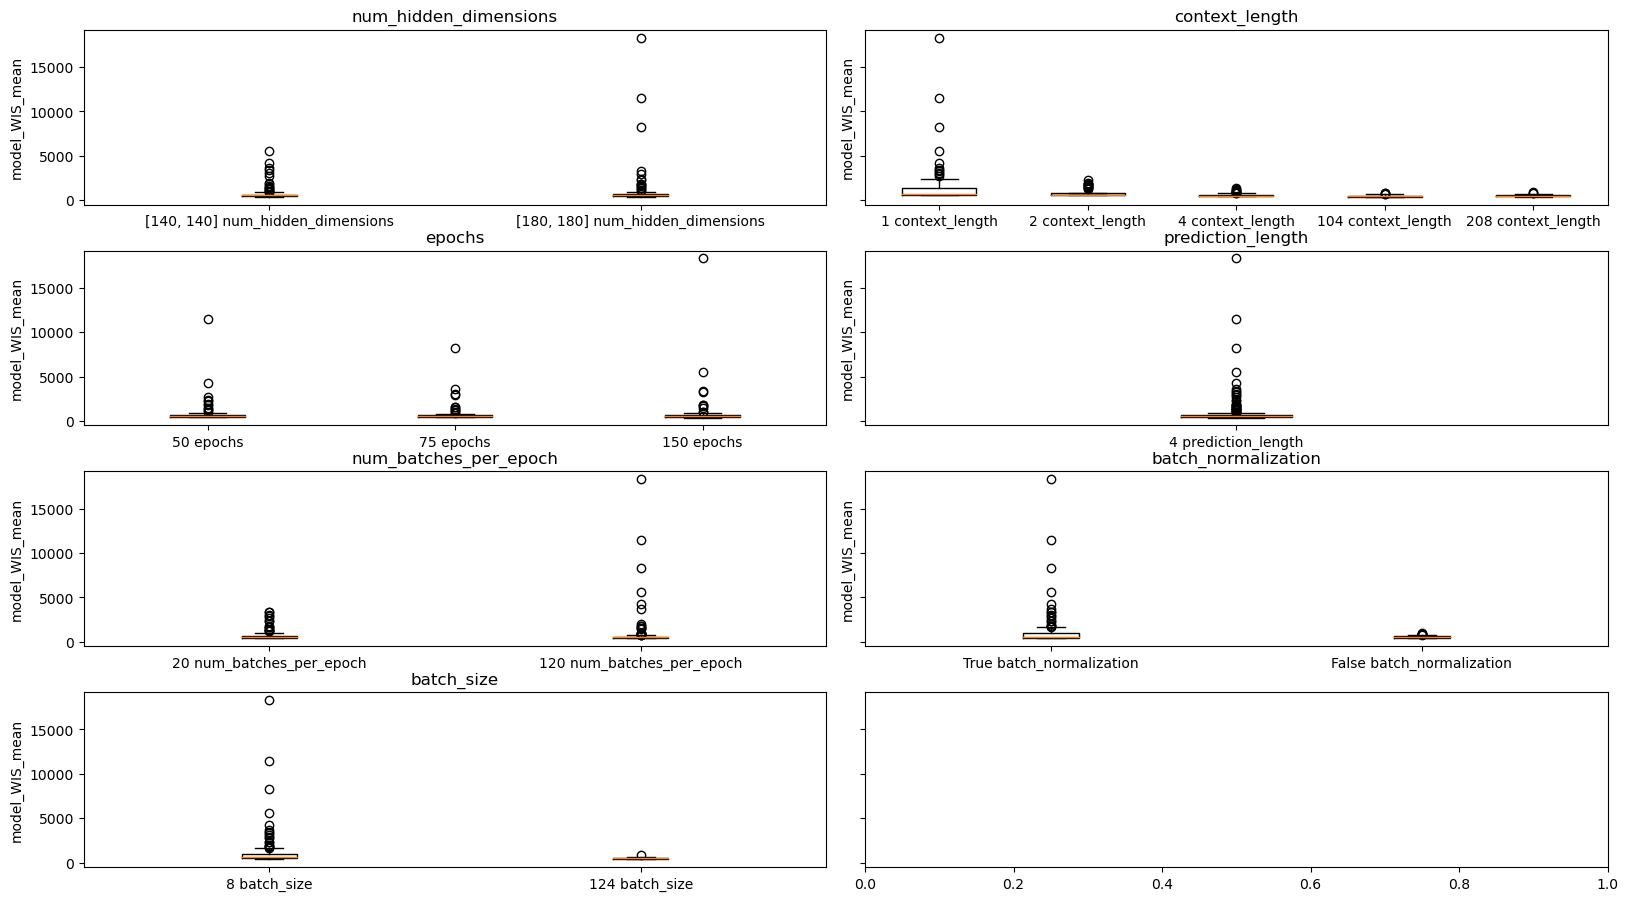

In [24]:
unique_df_31_05_02 = overall_df_31_05_02[added_cols+[col for col in df_31_05_02.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates()
print(len(unique_df_31_05_02))
print(len(overall_df_31_05_02))
#hyperparameter_boxplots(unique_df_30_05_02, hp_search_space_30_05_02, col="model_WIS_variance")
#print("________________")
hyperparameter_boxplots(unique_df_31_05_02, hp_search_space_31_05_02, col="model_WIS_mean")

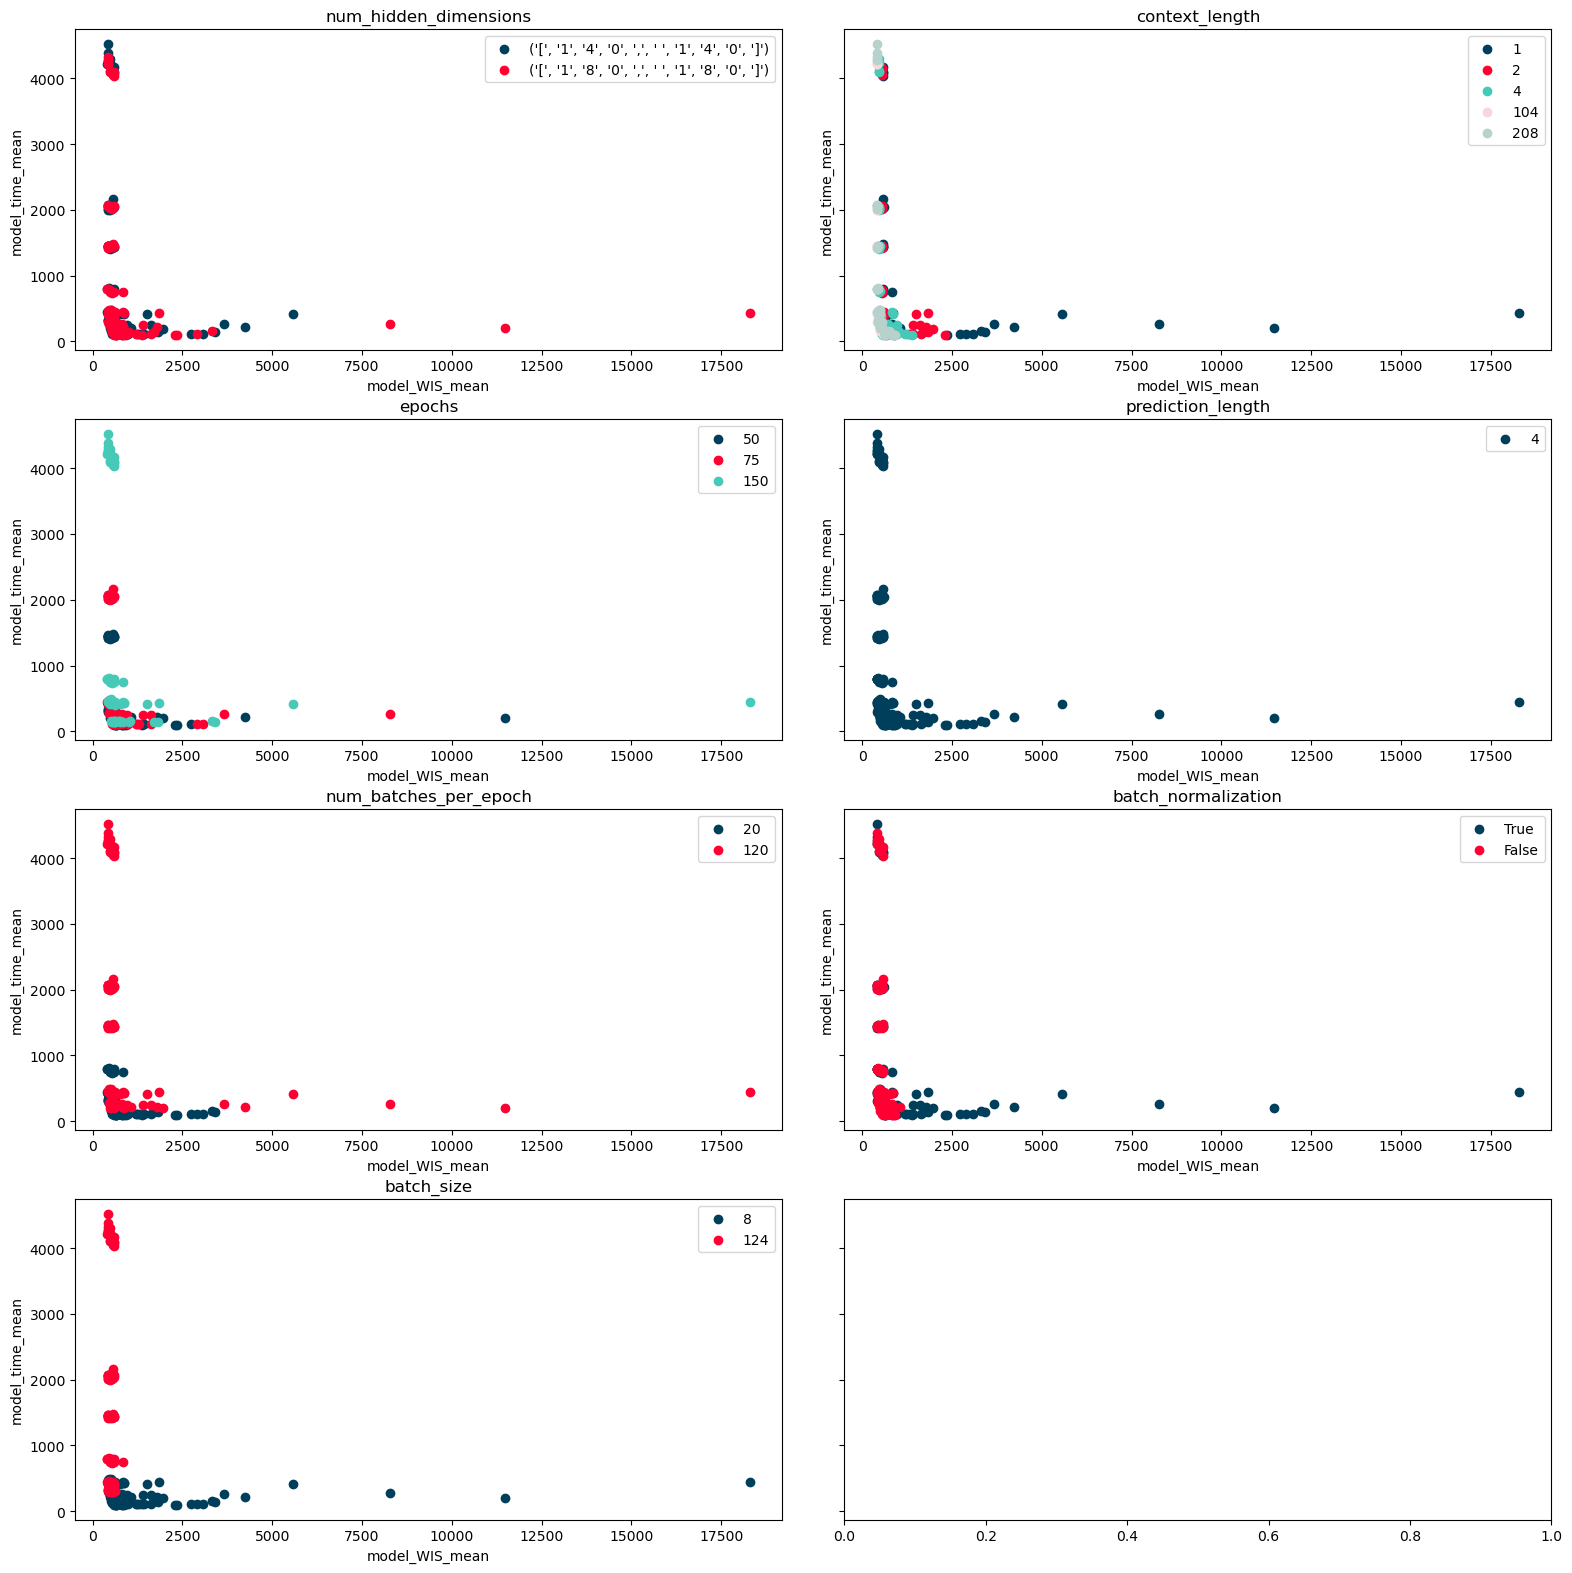

In [25]:
hp_color_plot(config, overall_df_31_05_02, hp_search_space_31_05_02, )

# 01.06

In [26]:
df_01_06 = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/HyperparameterFiles/FNN_Hyperparameter_results_01_06.csv", sep=',')
hp_search_space_01_06 = {
    "num_hidden_dimensions": tune.grid_search([[140,140],[100, 100],[200,200], [40, 40]]),
    "context_length":tune.grid_search([32, 52, 64, 104, 208]),
    "epochs":tune.grid_search([75, 150, 200]),
    "prediction_length" : tune.grid_search([4]), 
    "num_batches_per_epoch":tune.grid_search([20, 60]),
    "batch_normalization":tune.grid_search([True, False]),
    "batch_size":tune.grid_search([64, 124]),
    }
if "config/num_hidden_dimensions"in list(df_01_06.columns):
    df_01_06["config/num_hidden_dimensions"]=df_01_06["config/num_hidden_dimensions"].apply(lambda x: tuple(x))
model_results_by_hp_01_06, overall_df_01_06 = generate_model_results_by_hp_dict(df_01_06, hp_search_space_01_06)

There are combinations with fewer modelRuns!!
                           total_modelruns  independent_combinations
modelruns_per_combination                                           
4.0                                    756                     189.0
3.0                                    507                     169.0
5.0                                    175                      35.0
2.0                                    174                      87.0


In [27]:
display(overall_df_01_06.sort_values("model_WIS_mean")[added_cols+[col for col in df_01_06.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates().head(20))

,model_WIS_mean,model_WIS_variance,model_WIS_sd,model_WIS_median,model_time_mean,model_time_variance,model_time_sd,model_time_median,shape,config/batch_normalization,config/batch_size,config/context_length,config/epochs,config/num_batches_per_epoch,config/num_hidden_dimensions,config/prediction_length
914,392.293654,111.604825,10.564318,392.293654,1048.255505,1570.233797,39.626176,1048.255505,2.0,True,124,104,75,60,"([, 4, 0, ,, , 4, 0, ])",4
454,394.959289,10.745211,3.277989,394.455561,2006.801774,8867.188187,94.165748,2013.661726,3.0,True,124,104,150,60,"([, 4, 0, ,, , 4, 0, ])",4
474,395.118124,1.022153,1.011016,395.118124,3261.305314,523293.920873,723.390573,3261.305314,2.0,True,124,104,200,60,"([, 4, 0, ,, , 4, 0, ])",4
452,396.284828,30.253420,5.500311,399.299835,1154.335954,16120.837601,126.967861,1135.269769,3.0,True,64,104,150,60,"([, 4, 0, ,, , 4, 0, ])",4
946,396.596174,0.021597,0.146961,396.596174,2664.858086,224.303412,14.976762,2664.858086,2.0,True,124,52,200,60,"([, 4, 0, ,, , 4, 0, ])",4
1608,396.858484,12.242624,3.498946,397.125143,1905.260946,17456.660143,132.123655,1925.349351,3.0,True,124,52,150,60,"([, 4, 0, ,, , 4, 0, ])",4
426,397.107460,29.995030,5.476772,397.107460,1092.182503,1.939514,1.392664,1092.182503,2.0,True,124,52,75,60,"([, 4, 0, ,, , 4, 0, ])",4
1609,397.837005,3.399964,1.843899,396.950665,1974.582415,62975.626872,250.949451,1897.697268,3.0,False,124,52,150,60,"([, 4, 0, ,, , 4, 0, ])",4
1474,400.528301,76.392350,8.740272,397.969765,1092.973990,1036.992097,32.202362,1095.526240,4.0,True,124,104,75,60,"([, 1, 0, 0, ,, , 1, 0, 0, ])",4
427,400.535958,45.225356,6.724980,400.535958,1099.212469,254.165794,15.942578,1099.212469,2.0,False,124,52,75,60,"([, 4, 0, ,, , 4, 0, ])",4


480
1612


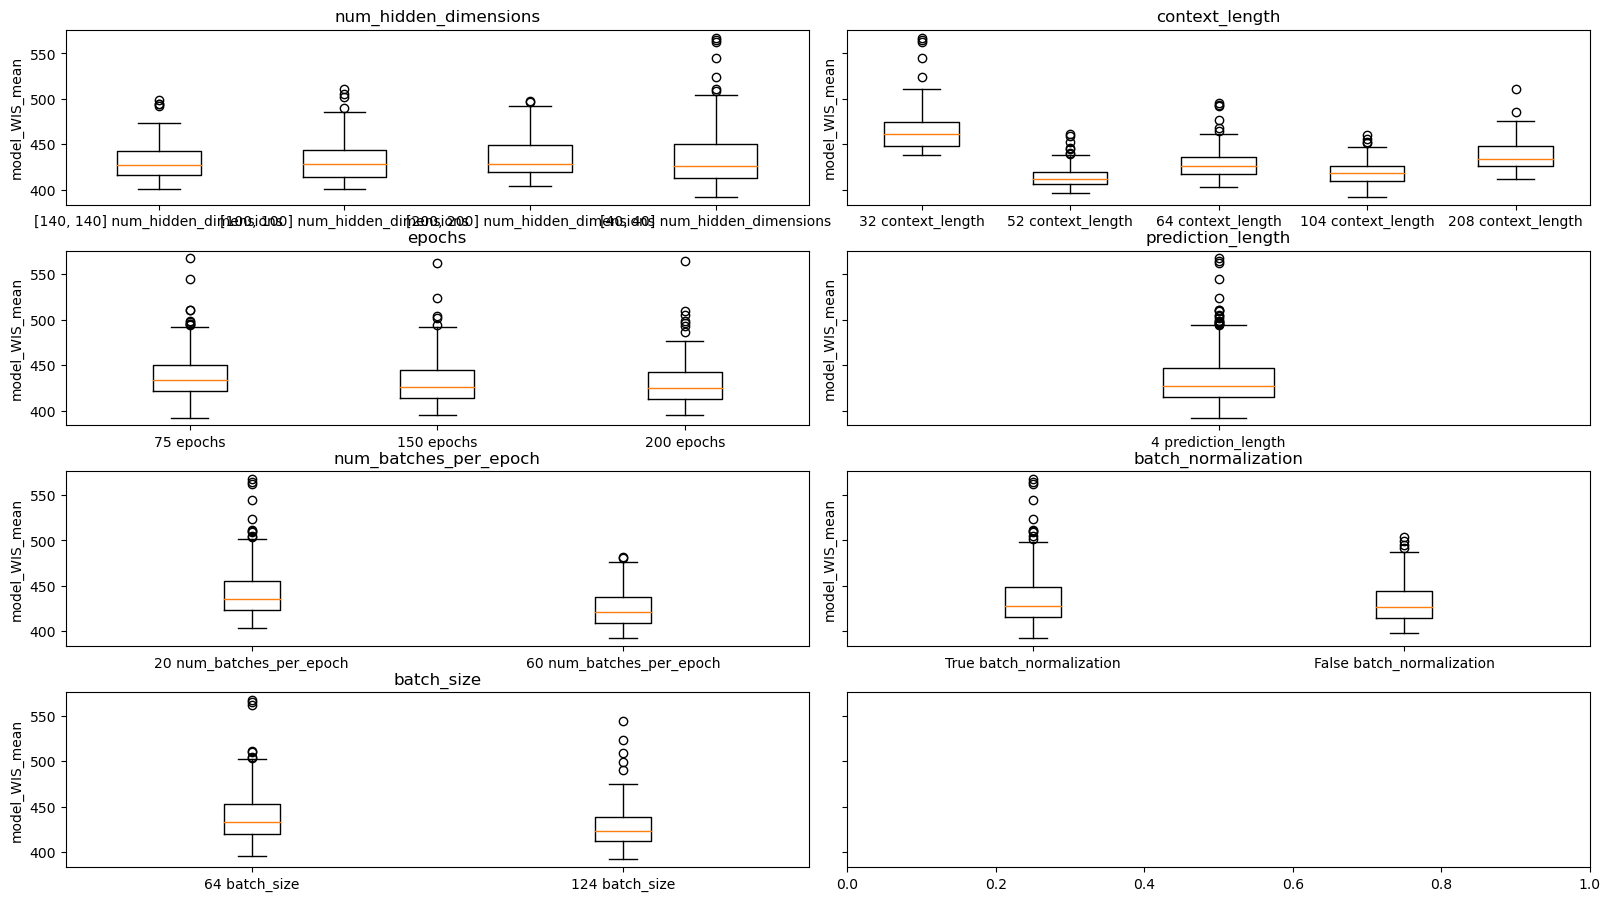

In [28]:
unique_df_01_06 = overall_df_01_06[added_cols+[col for col in df_31_05_01.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates()
print(len(unique_df_01_06))
print(len(overall_df_01_06))
#hyperparameter_boxplots(unique_df_01_06, hp_search_space_01_06, col="model_WIS_variance")
#print("________________")
hyperparameter_boxplots(unique_df_01_06, hp_search_space_01_06, col="model_WIS_mean")

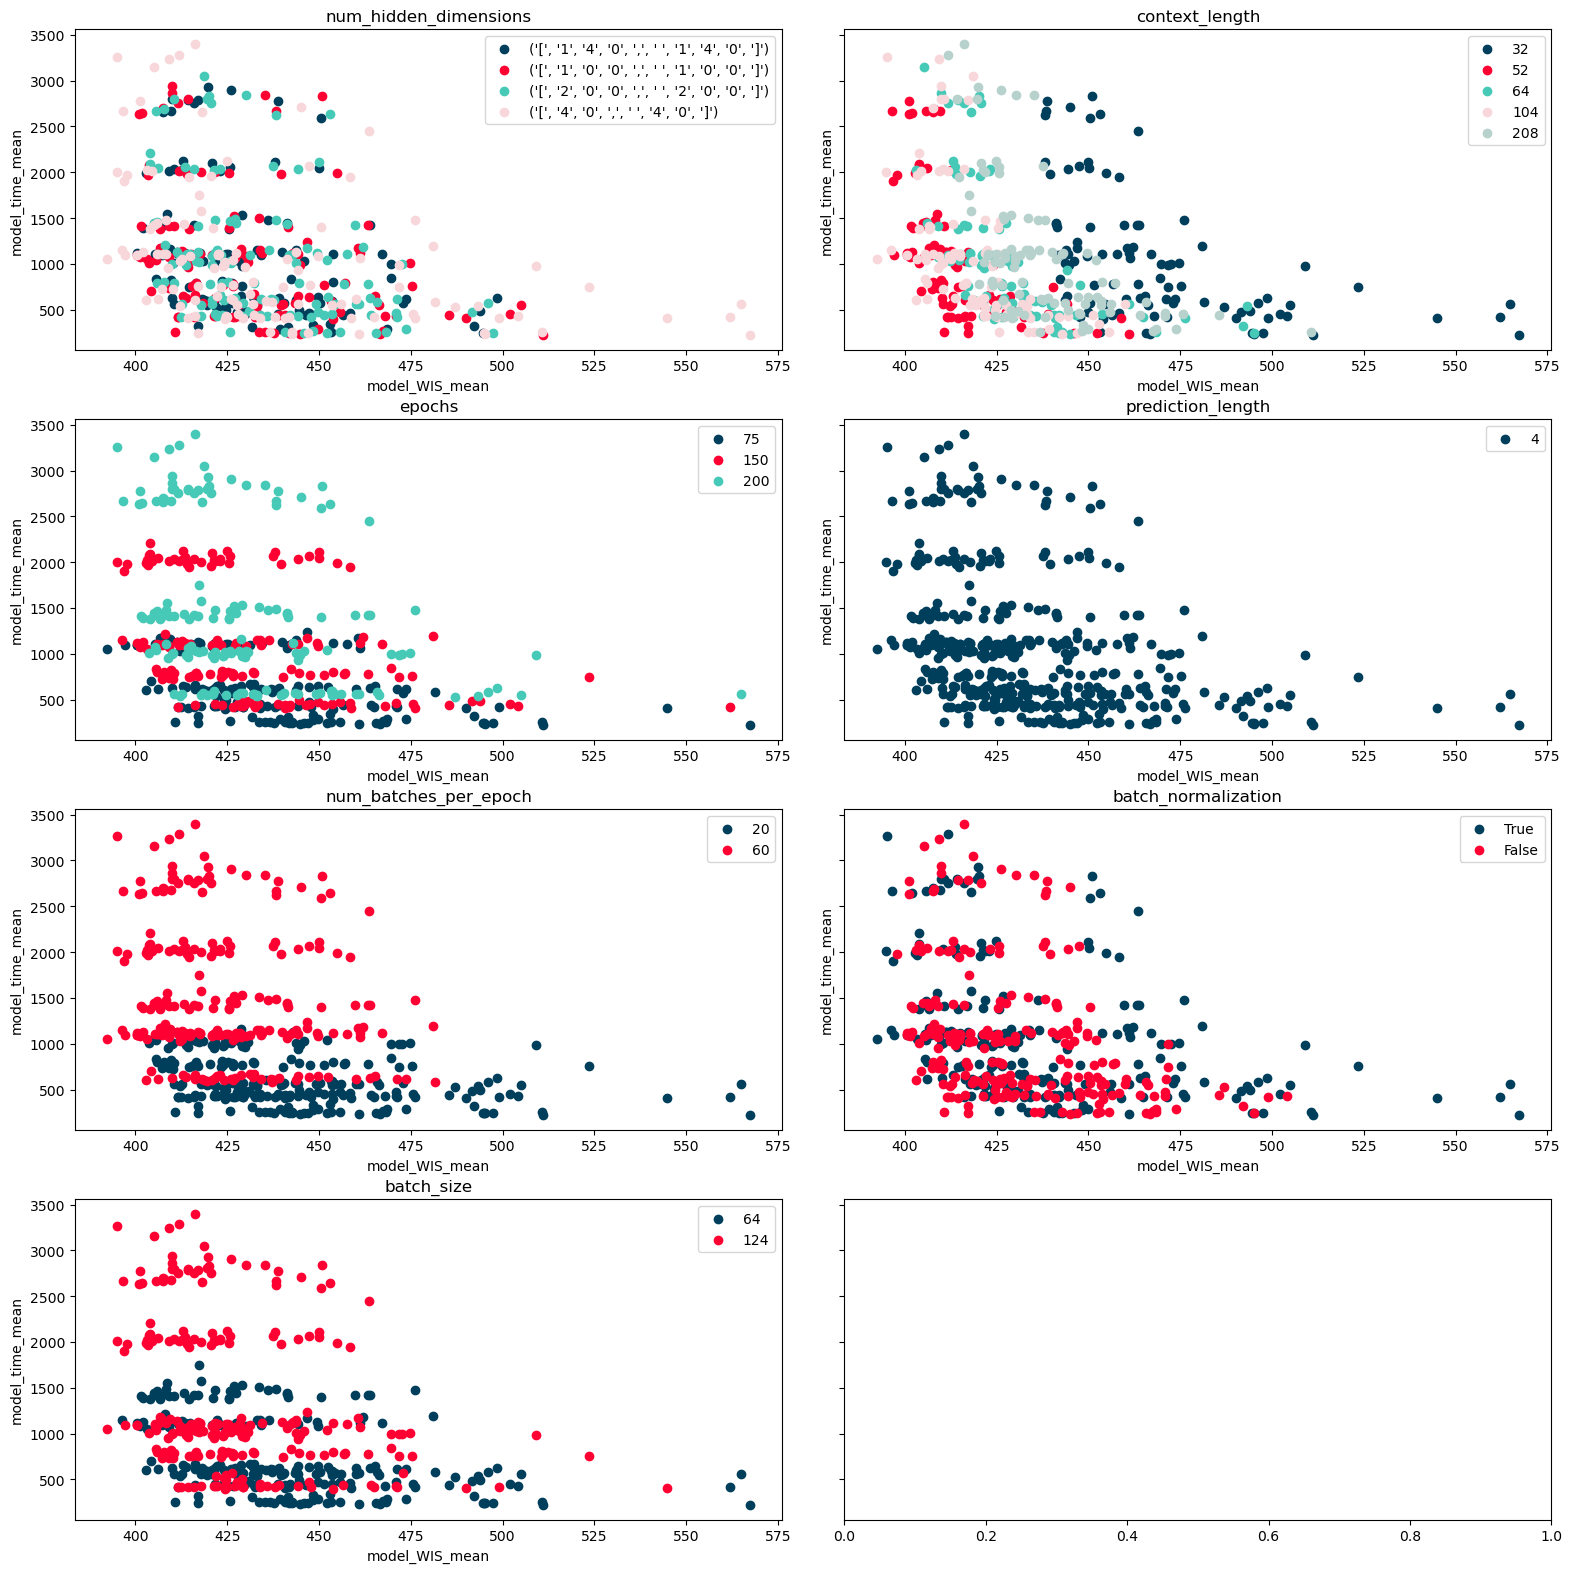

In [29]:
hp_color_plot(config, overall_df_01_06, hp_search_space_01_06, )

# 03.06

In [18]:
df_03_06 = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/HyperparameterFiles/FNNHyperparameter_results_03_06.csv", sep=',')
hp_search_space_03_06 = {
    "num_hidden_dimensions": tune.grid_search([[140,140],[40, 40]]),
    "context_length":tune.grid_search([52,104]),
    "epochs":tune.grid_search([100, 200]),
    "prediction_length" : tune.grid_search([4]), 
    "num_batches_per_epoch":tune.grid_search([100, 60]),
    "batch_normalization":tune.grid_search([True, False]),
    "batch_size":tune.grid_search([124]),
    }
if "config/num_hidden_dimensions"in list(df_03_06.columns):
    df_03_06["config/num_hidden_dimensions"]=df_03_06["config/num_hidden_dimensions"].apply(lambda x: tuple(x))
model_results_by_hp_03_06, overall_df_03_06 = generate_model_results_by_hp_dict(df_03_06, hp_search_space_03_06)

                           total_modelruns  independent_combinations
modelruns_per_combination                                           
5.0                                    270                      54.0


In [19]:
display(overall_df_03_06.sort_values("model_WIS_mean")[added_cols+[col for col in df_03_06.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates().head(20))

,model_WIS_mean,model_WIS_variance,model_WIS_sd,model_WIS_median,model_time_mean,model_time_variance,model_time_sd,model_time_median,shape,config/cell_type,config/context_length,config/epochs,config/num_cells,config/num_layers,config/use_feat_dynamic_real,config/use_feat_static_cat,config/use_feat_static_real
133,352.982640,34.791733,5.898452,353.110258,4436.703189,5240.835330,72.393614,4445.307727,5.0,lstm,2,200,140,6,True,False,False
19,357.679510,328.709586,18.130350,357.059406,3320.696718,8136.581519,90.203002,3374.560258,5.0,lstm,2,90,140,6,True,False,False
184,358.858485,117.185905,10.825244,360.743826,3843.268781,11204.882472,105.853117,3890.070355,5.0,lstm,2,140,140,6,True,False,False
16,360.682244,55.454657,7.446788,360.004162,2445.793537,705.289788,26.557293,2455.513743,5.0,lstm,2,200,60,6,True,False,False
52,361.620819,149.627195,12.232220,362.282538,7273.199446,69471.619730,263.574695,7279.973231,5.0,lstm,2,200,140,12,True,False,False
134,363.047112,183.124592,13.532354,355.672085,4794.713404,18183.630143,134.846691,4832.220718,5.0,lstm,4,200,140,6,True,False,False
185,364.105680,264.461761,16.262280,357.815919,4124.975469,19470.172134,139.535559,4167.003407,5.0,lstm,4,140,140,6,True,False,False
215,364.301014,634.193523,25.183199,362.720768,7981.863548,133448.458981,365.305980,8009.218266,5.0,lstm,4,200,140,12,True,False,False
128,364.746503,527.067728,22.957956,364.463908,3514.744765,10695.807665,103.420538,3515.233595,5.0,lstm,4,90,140,6,True,False,False
157,370.234010,218.399318,14.778339,363.995255,6752.176046,27819.365533,166.791383,6813.735701,5.0,lstm,2,140,140,12,True,False,False


54
270


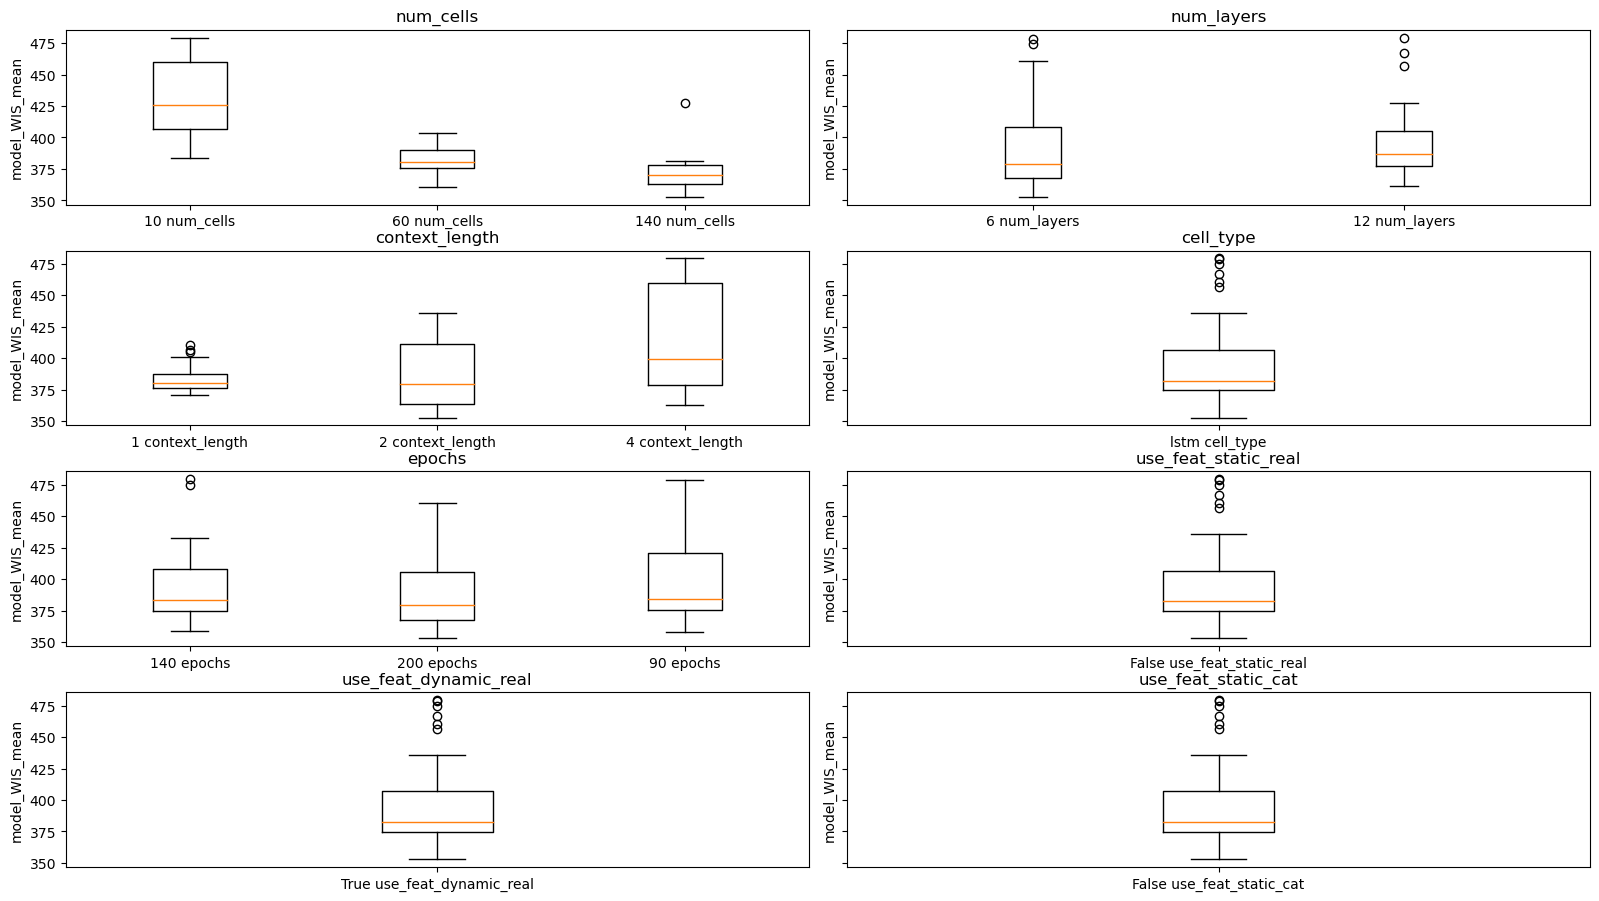

In [20]:
unique_df_03_06 = overall_df_03_06[added_cols+[col for col in df_03_06.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates()
print(len(unique_df_03_06))
print(len(overall_df_03_06))
#hyperparameter_boxplots(unique_df_31_05_01, hp_search_space_31_05_01, col="model_WIS_variance")
#print("________________")
hyperparameter_boxplots(unique_df_03_06, hp_search_space_03_06, col="model_WIS_mean")

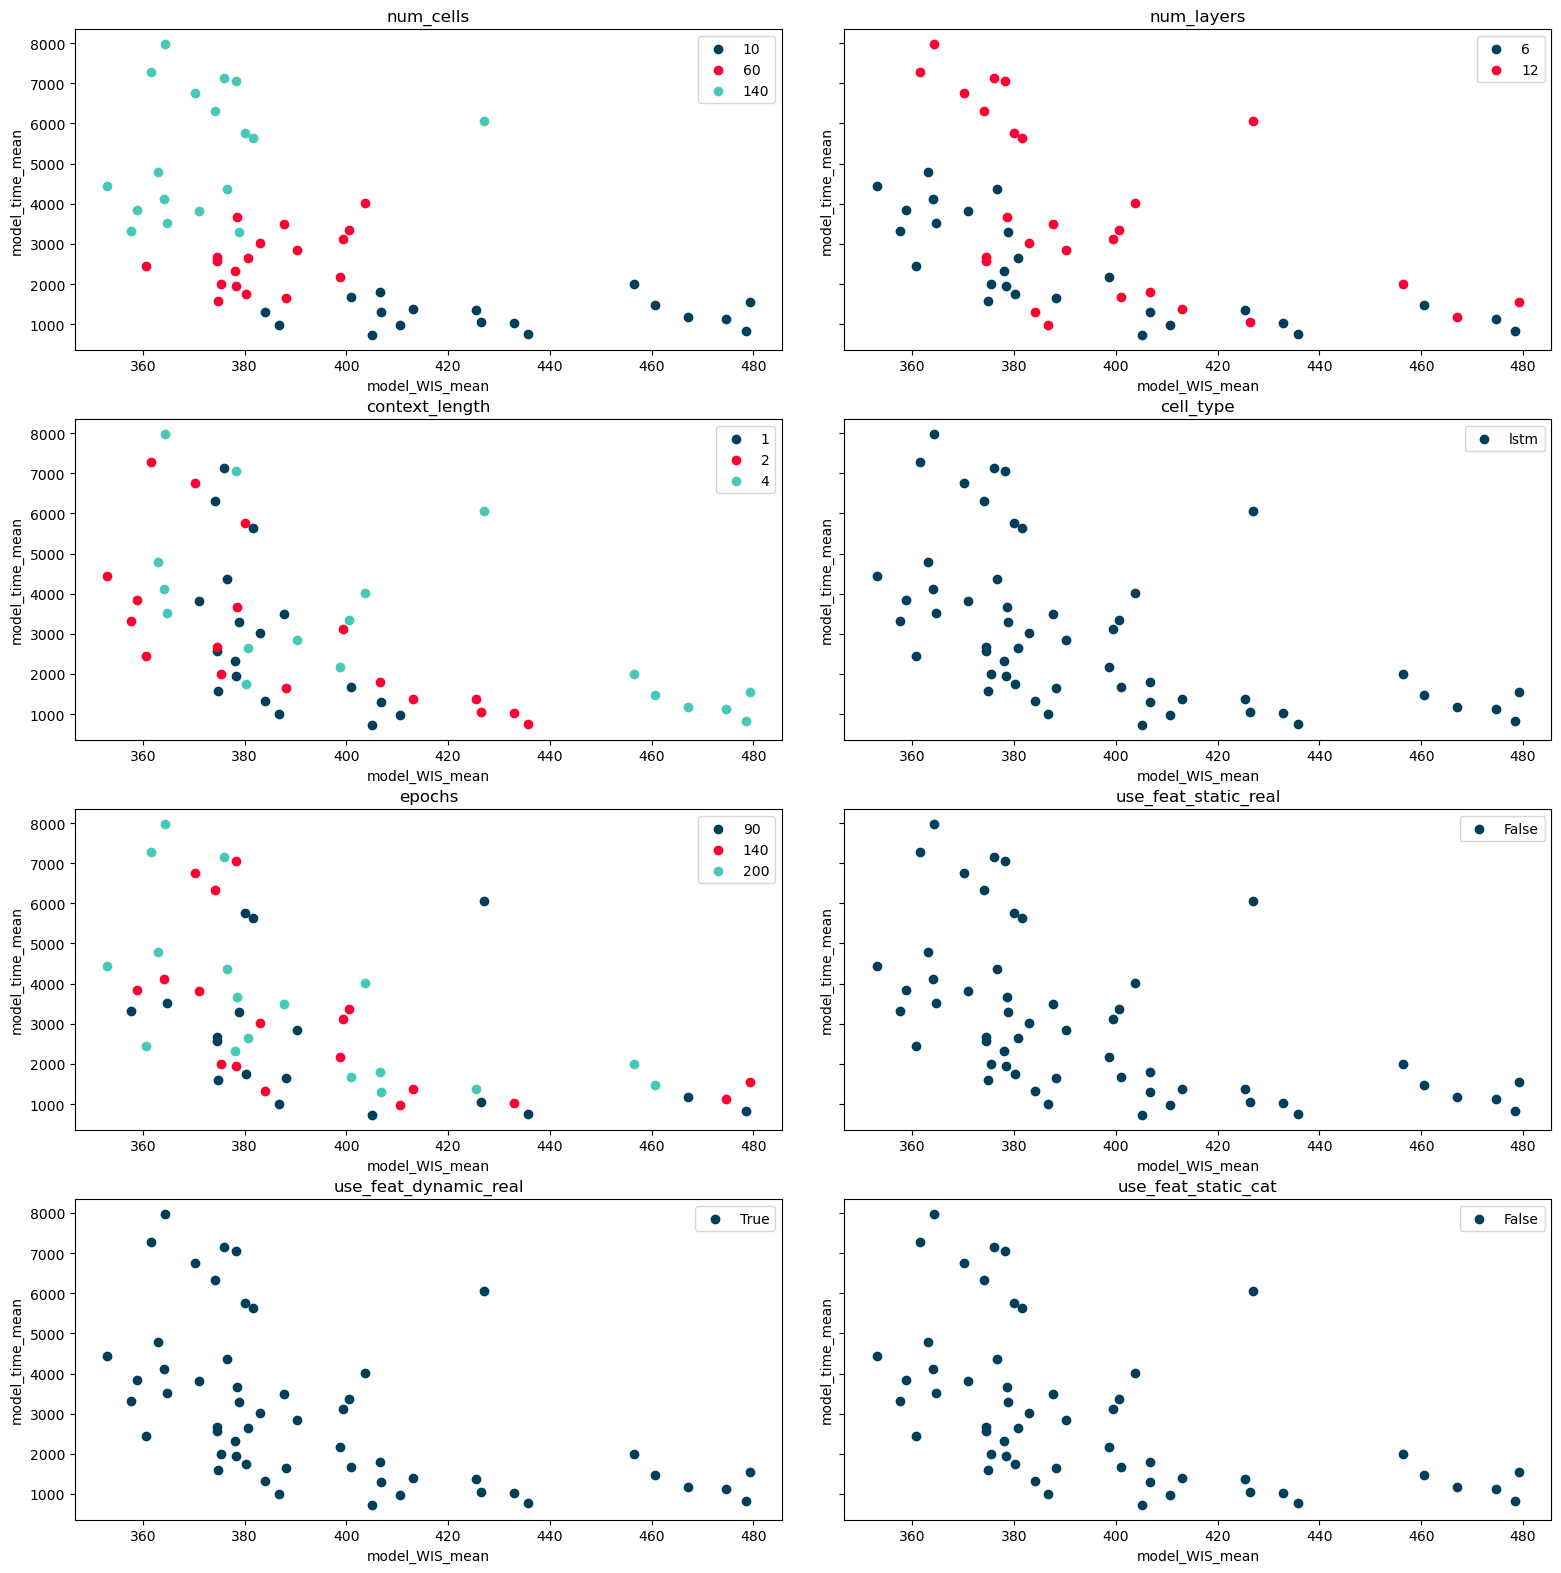

In [21]:
hp_color_plot(config, overall_df_03_06, hp_search_space_03_06, )